# **ITSM Improvement through Machine Learning: Enhancing Incident Management at ABC Tech.**

## **PROBLEM STATEMENT:**

*   Predicting High Priority Tickets: To predict priority 1 & 2 tickets, so that they can take preventive measures or fix the problem before it surfaces.

*   Forecast the incident volume in different fields , quarterly and annual. So that they can be better prepared with resources and technology planning.

*    Auto tag the tickets with right priorities and right departments so that reassigning and related delay can be reduced.

*    Predict RFC (Request for change) and possible failure / misconfiguration of ITSM assets.

## **Business Case Description:**

ABC Tech is an established mid-sized organization operating in the IT-enabled business sector for over a decade. They manage a significant volume of IT incidents and tickets, averaging between 22,000 to 25,000 per year. ABC Tech follows best practices in IT Service Management (ITSM), including incident management, problem management, change management, and configuration management processes. These ITIL practices have matured over time, reaching a high level of process maturity.

Recently, ABC Tech conducted an audit that indicated that further improvement initiatives in their ITSM processes may not provide a sufficient return on investment (ROI). Despite their mature processes, customer feedback from recent surveys has revealed that incident management, in particular, is rated poorly, suggesting there is room for enhancement.

In response to these challenges, ABC Tech's management has decided to explore the potential of machine learning (ML) to enhance their ITSM processes. After attending a Machine Learning conference focused on IT Service Management (ITSM), they identified four key areas where ML can contribute to improving ITSM processes within the organization:

1. **Predicting High Priority Tickets:** ABC Tech aims to develop an ML model that can predict high-priority tickets, specifically those categorized as priority 1 and 2. This prediction will allow them to take proactive measures to address issues or incidents before they escalate.

2. **Forecasting Incident Volume:** The organization plans to use ML to forecast the incident volume in different fields on a quarterly and annual basis. This predictive capability will help them better allocate resources and plan for the required technology upgrades.

3. **Auto-Tagging Tickets:** ABC Tech intends to implement a text classification ML model to automatically assign correct priorities and departments to incoming tickets. This automation will reduce reassignment and related delays in ticket handling.

4. **Predicting RFC and ITSM Asset Misconfigurations:** The organization aims to create predictive models for Request for Change (RFC) and detect potential failures or misconfigurations in ITSM assets. Identifying these issues in advance will help in preventing disruptions and improving overall ITSM asset management.

The dataset that ABC Tech plans to use for these ML initiatives comprises a total of approximately 46,000 records spanning the years 2012, 2013, and 2014. The data is stored in a MySQL database with read-only access, and the relevant connection details are provided.

Here's a summary of some key fields in the dataset:

- **CI_Name**: Configuration Item Name – the name of the specific asset or item involved in the incident.
- **CI_Cat**: Configuration Item Category – broad category under which the configuration item falls (e.g., hardware, software).
- **CI_Subcat**: Configuration Item Subcategory – more detailed classification within the configuration item category.
- **WBS**: Work Breakdown Structure – a project management reference often used to structure tasks and identify resources.
Incident_ID: Incident Identifier – unique identifier for each incident.
- **Status:** Status of the Incident – current status of the incident (e.g., open, closed, in progress).
- **Impact:** Impact Level – how critical the incident is in terms of its effect on business operations.
- Urgency: Urgency Level – priority level for addressing the incident, potentially guiding response time.
- **Priority:** Priority Level – overall priority based on a combination of impact and urgency.
- **number_cnt:** Count Number – could be the number of occurrences or a frequency count related to the incident.
- **Category:** Category of the Incident – broader category classifying the type of incident (e.g., service request, problem, change).
- **KB_number:** Knowledge Base Number – reference to a knowledge base article or resource that might assist in resolving the incident.
- **Alert_Status:** Alert Status – current alert status of the incident (e.g., critical, warning, resolved).
- **No_of_Reassignments:** Number of Reassignments – count of times the incident has been reassigned to different teams or personnel.
- **Open_Time:** Open Time – timestamp for when the incident was first reported or logged.
- **Reopen_Time:** Reopen Time – timestamp for when the incident was reopened, if applicable.
- **Resolved_Time:** Resolved Time – timestamp for when the incident was resolved.
- **Close_Time:** Close Time – timestamp for when the incident was officially closed.
- **Handle_Time_hrs:** Handling Time in Hours – total time spent handling the incident in hours.
- **Closure_Code:** Closure Code – code or reason for closing the incident (e.g., resolved, rejected, duplicate).
- **No_of_Related_Interactions:** Number of Related Interactions – count of interactions (e.g., emails, calls) related to the incident.
- **Related_Interaction:** Related Interaction – reference or ID for interactions associated with the incident.
- **No_of_Related_Incidents:** Number of Related Incidents – count of other incidents linked to this one.
- **No_of_Related_Changes:** Number of Related Changes – count of related change requests associated with the incident.
- **Related_Change:** Related Change – reference or ID for a change request associated with the incident.


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# **Data Analysis Report**

### **Importing Libraries**:

In [ ]:
!pip install mysql-connector-python
import mysql.connector

In [ ]:

import pandas as pd
import numpy as np

import os
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import recall_score, precision_score, f1_score
from sklearn.metrics import roc_auc_score, RocCurveDisplay, ConfusionMatrixDisplay


### **Exporting Data from MYSQL**

In [ ]:
# Define database connection details
host = "18.136.157.135"
user = "dm_team"
password = "DM!$Team@&27920!"
database = "project_itsm"

# Establish connection to the database
try:
    connection = mysql.connector.connect(
        host=host,
        user=user,
        password=password,
        database=database
    )
    print("Connection successful!")

    # Define the SQL query to retrieve the dataset (adjust if necessary)
    query = "SELECT * FROM dataset_list;"  # Replace 'your_table_name' with the actual table name

    # Load the data into a DataFrame
    data = pd.read_sql(query, connection)



    directory = "/content/drive/MyDrive/CLient Project ITSM process"
    file_path = os.path.join(directory, "dataset.csv")

    # Create the directory if it doesn’t exist
    os.makedirs(directory, exist_ok=True)

    # Save the DataFrame to the specified path
    data.to_csv(file_path, index=False)


    print("Dataset downloaded and saved as 'dataset.csv'.")

except mysql.connector.Error as err:
    print(f"Error: {err}")

finally:
    # Close the database connection
    if connection.is_connected():
        connection.close()
        print("Connection closed.")


In [ ]:
# Importing CSV file from the downloaded path
data = pd.read_csv("/content/drive/MyDrive/CLient Project ITSM process/dataset.csv")

#### **sample() is used to get random values from whole data set**

In [ ]:
data.sample(1)

,CI_Name,CI_Cat,CI_Subcat,WBS,Incident_ID,Status,Impact,Urgency,Priority,number_cnt,...,Reopen_Time,Resolved_Time,Close_Time,Handle_Time_hrs,Closure_Code,No_of_Related_Interactions,Related_Interaction,No_of_Related_Incidents,No_of_Related_Changes,Related_Change
35971,CBD001030,computer,Banking Device,WBS000016,IM0036281,Closed,4,4,4.0,0.3795,...,NaN,21-02-2014 12:40,21-02-2014 12:42,"6,26,85,27,778",Other,1.0,SD0110547,NaN,NaN,NaN


### **Getting Basic information in the dataset**

In [ ]:
data.columns

Index(['CI_Name', 'CI_Cat', 'CI_Subcat', 'WBS', 'Incident_ID', 'Status',
       'Impact', 'Urgency', 'Priority', 'number_cnt', 'Category', 'KB_number',
       'Alert_Status', 'No_of_Reassignments', 'Open_Time', 'Reopen_Time',
       'Resolved_Time', 'Close_Time', 'Handle_Time_hrs', 'Closure_Code',
       'No_of_Related_Interactions', 'Related_Interaction',
       'No_of_Related_Incidents', 'No_of_Related_Changes', 'Related_Change'],
      dtype='object')

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46606 entries, 0 to 46605
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   CI_Name                     46606 non-null  object 
 1   CI_Cat                      46495 non-null  object 
 2   CI_Subcat                   46495 non-null  object 
 3   WBS                         46606 non-null  object 
 4   Incident_ID                 46606 non-null  object 
 5   Status                      46606 non-null  object 
 6   Impact                      46606 non-null  object 
 7   Urgency                     46606 non-null  object 
 8   Priority                    45226 non-null  float64
 9   number_cnt                  46606 non-null  float64
 10  Category                    46606 non-null  object 
 11  KB_number                   46606 non-null  object 
 12  Alert_Status                46606 non-null  object 
 13  No_of_Reassignments         466

In [ ]:
data.isnull().sum()

,0
CI_Name,0
CI_Cat,111
CI_Subcat,111
WBS,0
Incident_ID,0
Status,0
Impact,0
Urgency,0
Priority,1380
number_cnt,0


##### **The Dataset consist of large number of null values**

In [ ]:
# checking the dataset having duplicate values
data.duplicated().sum()

0

##### **The dataset dosen't consist of any duplicate values**

In [ ]:
data.describe()

,Priority,number_cnt,No_of_Reassignments,No_of_Related_Interactions,No_of_Related_Incidents,No_of_Related_Changes
count,45226.000000,46606.000000,46605.000000,46492.000000,1222.000000,560.000000
mean,4.215805,0.499658,1.131831,1.149897,1.669394,1.058929
std,0.705624,0.288634,2.269774,2.556338,3.339687,0.403596
min,1.000000,0.000023,0.000000,1.000000,1.000000,1.000000
25%,4.000000,0.248213,0.000000,1.000000,1.000000,1.000000
50%,4.000000,0.500269,0.000000,1.000000,1.000000,1.000000
75%,5.000000,0.749094,2.000000,1.000000,1.000000,1.000000
max,5.000000,0.999997,46.000000,370.000000,63.000000,9.000000


In [ ]:
data.describe(include='O')

,CI_Name,CI_Cat,CI_Subcat,WBS,Incident_ID,Status,Impact,Urgency,Category,KB_number,Alert_Status,Open_Time,Reopen_Time,Resolved_Time,Close_Time,Handle_Time_hrs,Closure_Code,Related_Interaction,Related_Change
count,46606,46495,46495,46606,46606,46606,46606,46606,46606,46606,46606,46606,2284,44826,46606,46605,46146,46606,560
unique,3019,12,64,274,46606,2,6,11,4,1825,1,34636,2244,33627,34528,30638,14,43060,232
top,SUB000456,application,Server Based Application,WBS000073,IM0000004,Closed,4,4,incident,KM0001106,closed,24-03-2014 08:54,29-10-2013 15:03,10-10-2013 12:53,02-10-2013 15:20,0,Other,#MULTIVALUE,C00003013
freq,3050,32900,18811,13342,1,46597,22556,15526,37748,1106,46606,7,2,7,21,236,16470,3434,110


In [ ]:
numerical = data.select_dtypes(include=['float', 'int'])
numerical.columns

Index(['Priority', 'number_cnt', 'No_of_Reassignments',
       'No_of_Related_Interactions', 'No_of_Related_Incidents',
       'No_of_Related_Changes'],
      dtype='object')

In [ ]:
categorical = data.select_dtypes(include='O')

categorical.columns

Index(['CI_Name', 'CI_Cat', 'CI_Subcat', 'WBS', 'Incident_ID', 'Status',
       'Impact', 'Urgency', 'Category', 'KB_number', 'Alert_Status',
       'Open_Time', 'Reopen_Time', 'Resolved_Time', 'Close_Time',
       'Handle_Time_hrs', 'Closure_Code', 'Related_Interaction',
       'Related_Change'],
      dtype='object')

In [ ]:
unique_values = {col: data[col].unique() for col in data.columns}
unique_values

{'CI_Name': array(['SUB000508', 'WBA000124', 'DTA000024', ..., 'CBD000595',
        'CBD000443', 'SWT000008'], dtype=object),
 'CI_Cat': array(['subapplication', 'application', 'computer', nan, 'displaydevice',
        'software', 'storage', 'database', 'hardware', 'officeelectronics',
        'networkcomponents', 'applicationcomponent', 'Phone'], dtype=object),
 'CI_Subcat': array(['Web Based Application', 'Desktop Application',
        'Server Based Application', 'SAP', 'Client Based Application',
        'Citrix', 'Standard Application', 'Windows Server', 'Laptop',
        'Linux Server', nan, 'Monitor', 'Automation Software', 'SAN',
        'Banking Device', 'Desktop', 'Database', 'Oracle Server',
        'Keyboard', 'Printer', 'Exchange', 'System Software', 'VDI',
        'Encryption', 'Omgeving', 'MigratieDummy', 'Scanner', 'Controller',
        'DataCenterEquipment', 'KVM Switches', 'Switch',
        'Database Software', 'Network Component', 'Unix Server', 'Lines',
        'ESX 

### **Replacing Null Values**

In [ ]:
data.isnull().sum()

,0
CI_Name,0
CI_Cat,111
CI_Subcat,111
WBS,0
Incident_ID,0
Status,0
Impact,0
Urgency,0
Priority,1380
number_cnt,0


In [ ]:
# Checking the null values in percentage
data.isnull().sum()/len(data)*100

,0
CI_Name,0.000000
CI_Cat,0.000000
CI_Subcat,0.000000
WBS,0.000000
Incident_ID,0.000000
Status,0.000000
Impact,0.000000
Urgency,0.000000
Priority,0.000000
number_cnt,0.000000


##### **1. Replacing Null Value for CI_CAT**

In [ ]:
data['CI_Cat'].value_counts()

,count
CI_Cat,
application,32900
subapplication,7782
computer,3643
storage,703
hardware,442
software,333
database,214
displaydevice,212
officeelectronics,152


In [ ]:
data['CI_Cat'].mode()

,CI_Cat
0,application


In [ ]:
data['CI_Cat'] = data['CI_Cat'].fillna(data['CI_Cat'].mode().iloc[0])
data['CI_Cat'].isnull().sum()

0

##### **2. Replacing Null Value for CI_Subcat**

In [ ]:
data['CI_Subcat'].mode()

,CI_Subcat
0,Server Based Application


In [ ]:
data['CI_Subcat'] = data['CI_Subcat'].fillna(data['CI_Subcat'].mode().iloc[0])
data['CI_Subcat'].isnull().sum()

0

##### **3. Replacing Null Value for Priority**

In [ ]:
data['Priority'].mean()

4.215805067881307

In [ ]:
data['Priority'].median()

4.0

In [ ]:
data['Priority'] = data['Priority'].fillna(data['Priority'].median())
data['Priority'].isnull().sum()

0

##### **4. Replacing Null Value for No_of_Reassignments**

In [ ]:
data['No_of_Reassignments'].mean()

1.1318313485677503

In [ ]:
data['No_of_Reassignments'].median()

0.0

In [ ]:
data['No_of_Reassignments'] = data['No_of_Reassignments'].fillna(data['No_of_Reassignments'].mean())
data['No_of_Reassignments'].isnull().sum()

0

##### **5. Replacing Null Value for Closure_Code**

In [ ]:
data['Closure_Code'].mode()

,Closure_Code
0,Other


In [ ]:
data['Closure_Code'] = data['Closure_Code'].fillna(data['Closure_Code'].mode().iloc[0])
data['Closure_Code'].isnull().sum()

0

##### **6. Replacing Null Value for No_of_Related_Interactions**

In [ ]:
data['No_of_Related_Interactions'].mean()

1.149896756431214

In [ ]:
data['No_of_Related_Interactions'].median()

1.0

In [ ]:
data['No_of_Related_Interactions'] = data['No_of_Related_Interactions'].fillna(data['No_of_Related_Interactions'].median())
data['No_of_Related_Interactions'].isnull().sum()

0

##### **6. Replacing Null Value for No_of_Related_Changes**

In [ ]:
data['No_of_Related_Changes'].sample(10)

,No_of_Related_Changes
6321,NaN
38004,NaN
13973,NaN
25699,NaN
34117,NaN
11883,NaN
40215,NaN
39956,NaN
33043,NaN
33685,NaN


In [ ]:
data['No_of_Related_Changes'].value_counts()

,count
No_of_Related_Changes,
1.0,536
2.0,21
3.0,2
9.0,1


In [ ]:
data['No_of_Related_Changes'].median()

1.0

In [ ]:
data['No_of_Related_Changes'] = data['No_of_Related_Changes'].fillna(2)
data['No_of_Related_Changes'].isnull().sum()

0

In [ ]:
data['No_of_Related_Changes'].value_counts()

,count
No_of_Related_Changes,
2.0,46067
1.0,536
3.0,2
9.0,1


##### **6. Replacing Null Value for No_of_Related_Incidents**

In [ ]:
data['No_of_Related_Incidents'].sample(10)

,No_of_Related_Incidents
29108,NaN
14423,NaN
20441,NaN
45071,NaN
7755,NaN
22275,NaN
17744,NaN
20229,NaN
24440,NaN
17771,NaN


In [ ]:
data['No_of_Related_Incidents'].value_counts()

,count
No_of_Related_Incidents,
1.0,1057
2.0,74
3.0,20
4.0,13
5.0,8
6.0,8
9.0,6
8.0,5
11.0,4


In [ ]:
data['No_of_Related_Incidents'].median()

1.0

In [ ]:
data['No_of_Related_Incidents'] = data['No_of_Related_Incidents'].fillna(2)
data['No_of_Related_Incidents'].isnull().sum()

0

In [ ]:
data['No_of_Related_Incidents'].value_counts()

,count
No_of_Related_Incidents,
2.0,45458
1.0,1057
3.0,20
4.0,13
5.0,8
6.0,8
9.0,6
8.0,5
11.0,4


##### **7. Dropping Null Value for Handle_Time_hrs**
###### since it is having only 1null value

In [ ]:
data= data.dropna(subset=['Handle_Time_hrs'])

##### **8. Replacing Null Value for Resolved_Time**

In [ ]:
data['Resolved_Time'].mode()

,Resolved_Time
0,10-10-2013 12:53


In [ ]:
data['Resolved_Time'] = data['Resolved_Time'].fillna(data['Resolved_Time'].mode().iloc[0])
data['Resolved_Time'].isnull().sum()

0

#### **CI_Cat & CI_Subcat had a lot of labels which were replaced to take the major ones**

In [ ]:
data.CI_Cat.replace(['database'],'storage',inplace=True)
data.CI_Cat.replace(['applicationcomponent'],'subapplication',inplace=True)
data.CI_Cat.replace(['displaydevice','officeelectronics','Phone','networkcomponents'],'hardware',inplace=True)
data.CI_Cat.replace(np.nan,'application',inplace=True)

In [ ]:
data.CI_Subcat.replace('Desktop','Desktop Application',inplace=True)
data.CI_Subcat.replace(['Application Server','Virtual Tape Server','ESX Server','zOS Server','Neoview Server','X86 Server',
                       'Unix Server','Oracle Server','Windows Server in extern beheer','Thin Client','NonStop Server',
                       'Number','Windows Server','Linux Server',np.nan,'SharePoint Farm','Lines'],
                       'Server Based Application',inplace=True)
data.CI_Subcat.replace('RAC Service','Banking Device',inplace=True)
data.CI_Subcat.replace(['Iptelephony','Protocol','Net Device','IPtelephony','ESX Cluster','Standard Application'],
                       'Web Based Application',inplace=True)
data.CI_Subcat.replace(['VMWare','Security Software','zOS Systeem','Firewall','Database Software','VDI','Instance',
                       'MQ Queue Manager','Automation Software','Citrix','SAP','Encryption'],'System Software',inplace=True)
data.CI_Subcat.replace(['UPS','Omgeving'],'Client Based Application',inplace=True)
data.CI_Subcat.replace(['NonStop Storage','NonStop Harddisk','Tape Library','zOS Cluster','DataCenterEquipment',
                       'MigratieDummy'],'Database',inplace=True)
data.CI_Subcat.replace(['Modem','Router'],'Network Component',inplace=True)
data.CI_Subcat.replace('KVM Switches','Switch',inplace=True)

### **Checking for Outliers**

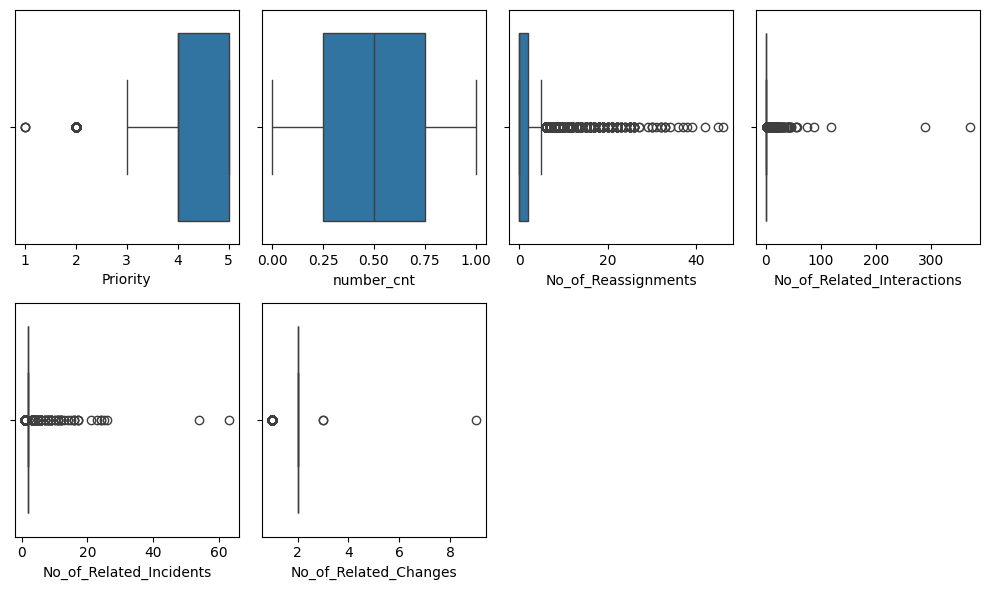

In [ ]:
plt.figure(figsize=(10,6))
plotnumber=1
for col in numerical:
  if plotnumber<8:
    ax=plt.subplot(2,4,plotnumber)
    sns.boxplot(x=data[col])
    plt.xlabel(col,fontsize=10)

  plotnumber+=1
plt.tight_layout()
plt.show()

#### **1. Outliers Handle for No_of_Reassignments**

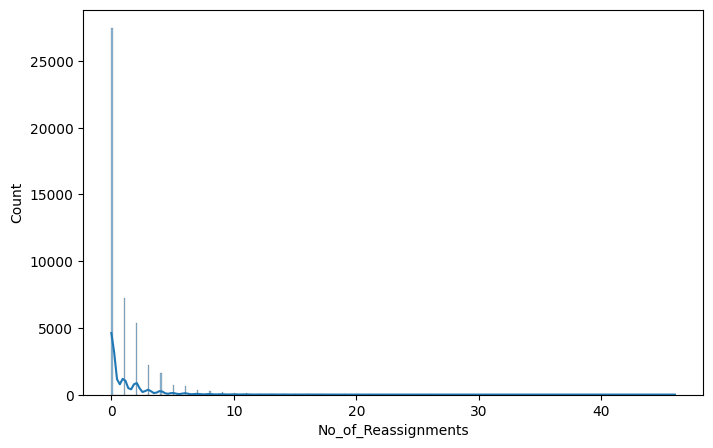

In [ ]:
plt.figure(figsize=(8,5))
sns.histplot(data=data,x='No_of_Reassignments',kde=True)
plt.show()

### **Insights**
* Most tickets (0 reassignments) are resolved without being reassigned.
* Reassignments decrease exponentially.
* There is a small peak at 3 reassignments.
* The majority of entities experienced no or minimal reassignments, highlighting that reassignments are rare and concentrated at the lower end of the spectrum.

In [ ]:
#Interquartile details checking

Q1=data["No_of_Reassignments"].quantile(0.25)
print("lower_quartile",Q1)
Q3=data["No_of_Reassignments"].quantile(0.75)
print("upper_quartile",Q3)

lower_quartile 0.0
upper_quartile 2.0


In [ ]:
IQR=Q3-Q1
IQR

2.0

In [ ]:
lower_limit=Q1-1.5*IQR
print("lower_limit is",lower_limit)
upper_limit=Q3+1.5*IQR
print("upper_limit is",upper_limit)

lower_limit is -3.0
upper_limit is 5.0


In [ ]:
data.loc[data["No_of_Reassignments"]>upper_limit].sample(10)

,CI_Name,CI_Cat,CI_Subcat,WBS,Incident_ID,Status,Impact,Urgency,Priority,number_cnt,...,Reopen_Time,Resolved_Time,Close_Time,Handle_Time_hrs,Closure_Code,No_of_Related_Interactions,Related_Interaction,No_of_Related_Incidents,No_of_Related_Changes,Related_Change
20628,SBA000759,application,Server Based Application,WBS000296,IM0020861,Closed,4,4,4.0,0.356634,...,NaN,13-12-2013 09:32,13-12-2013 09:32,"1,68,08,61,111",Other,1.0,SD0061308,2.0,2.0,NaN
3786,WBA000011,application,Web Based Application,WBS000152,IM0003908,Closed,5,5,5.0,0.866823,...,NaN,25-10-2013 09:38,25-10-2013 09:39,"5,02,54,44,444",Software,1.0,SD0009439,2.0,2.0,NaN
41218,SBA000263,application,Server Based Application,WBS000072,IM0041567,Closed,5,5,5.0,0.610524,...,NaN,07-03-2014 10:32,07-03-2014 10:33,"9,91,55,55,556",Other,1.0,SD0127421,2.0,2.0,NaN
25653,SBA000451,application,Server Based Application,WBS000073,IM0025918,Closed,4,4,4.0,0.379706,...,NaN,09-01-2014 07:04,09-01-2014 07:04,"1,78,12,77,778",Other,1.0,SD0077963,2.0,2.0,NaN
36664,SBA000526,application,Server Based Application,WBS000236,IM0036976,Closed,4,4,4.0,0.245832,...,NaN,05-03-2014 14:25,05-03-2014 14:25,"6,78,43,33,333",Software,1.0,SD0112879,2.0,2.0,NaN
29033,SAP000004,application,System Software,WBS000271,IM0029312,Closed,5,5,5.0,0.496399,...,NaN,03-02-2014 09:20,03-02-2014 09:20,"8,70,75,27,778",Other,1.0,SD0088376,2.0,2.0,NaN
22157,SBA000088,application,Server Based Application,WBS000017,IM0022397,Closed,4,4,4.0,0.301269,...,NaN,06-01-2014 09:39,06-01-2014 09:39,"1,16,31,66,667",Data,2.0,#MULTIVALUE,2.0,2.0,NaN
13890,WBA000058,application,Web Based Application,WBS000073,IM0014088,Closed,4,4,4.0,0.615194,...,NaN,29-11-2013 15:35,29-11-2013 15:36,"4,98,26,94,444",Software,1.0,SD0040168,2.0,2.0,NaN
17964,SBA000263,application,Server Based Application,WBS000072,IM0018187,Closed,5,5,5.0,0.438566,...,07-01-2014 12:07,07-01-2014 14:11,07-01-2014 14:11,"5,21,44,44,444",Other,3.0,#MULTIVALUE,2.0,2.0,NaN
11,WBA000124,application,Web Based Application,WBS000088,IM0000020,Closed,4,4,4.0,0.291928,...,NaN,08-11-2013 14:18,08-11-2013 14:22,"1,32,26,19,167",Software,1.0,SD0000042,2.0,2.0,NaN


#### **2. Outliers Handle for No_of_Related_Interactions**

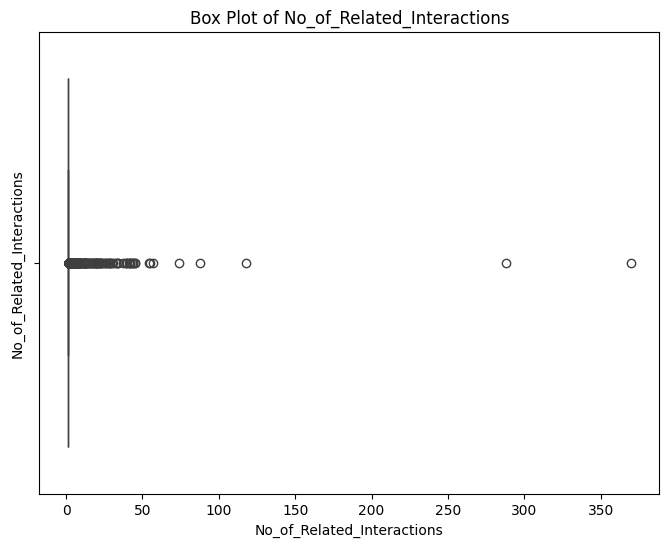

In [ ]:
# Create a box plot for the 'No_of_Related_Interactions' column
plt.figure(figsize=(8, 6))
sns.boxplot(x=data['No_of_Related_Interactions'])
plt.title('Box Plot of No_of_Related_Interactions')
plt.ylabel('No_of_Related_Interactions')
plt.show()

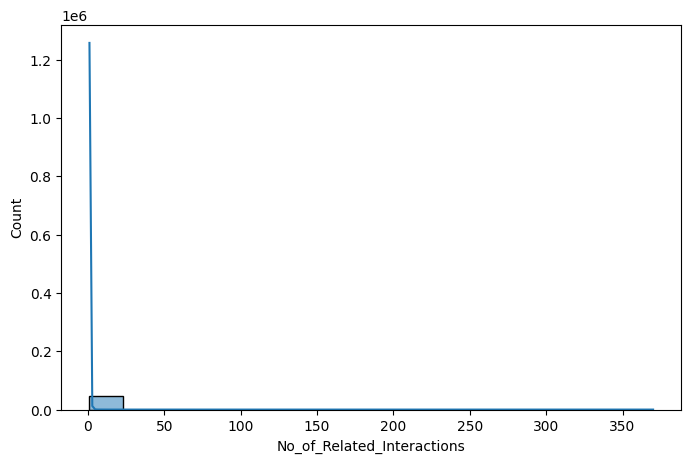

In [ ]:
plt.figure(figsize=(8,5))
sns.histplot(data=data,x='No_of_Related_Interactions',kde=True)
plt.show()

## **Insights**
- The graph is highly right-skewed, with an extremely large count for the lowest values and a rapid decline as the number of interactions increases.
- Most entities have no or very few related interactions, with a sharp drop in frequency as the number of interactions increases.
- A few rare outliers with a high number of interactions are present, indicating potential anomalies or special cases that may require further analysis.


In [ ]:
Q1 = data["No_of_Related_Interactions"].quantile(0.25)
print("lower_quantile",Q1)
Q3 = data["No_of_Related_Interactions"].quantile(0.75)
print("upper_quantile",Q3)

lower_quantile 1.0
upper_quantile 1.0


In [ ]:
IQR=Q3 - Q1
IQR

0.0

In [ ]:
lower_limit = Q1-1.5*IQR
print("lower_limit is",lower_limit)
upper_limit = Q3+1.5*IQR
print("upper_limit is",upper_limit)

lower_limit is 1.0
upper_limit is 1.0


In [ ]:
data.loc[data["No_of_Related_Interactions"]>upper_limit].sample(10)

,CI_Name,CI_Cat,CI_Subcat,WBS,Incident_ID,Status,Impact,Urgency,Priority,number_cnt,...,Reopen_Time,Resolved_Time,Close_Time,Handle_Time_hrs,Closure_Code,No_of_Related_Interactions,Related_Interaction,No_of_Related_Incidents,No_of_Related_Changes,Related_Change
21837,SBA000263,application,Server Based Application,WBS000072,IM0022074,Closed,3,3,3.0,0.394993,...,NaN,17-12-2013 11:04,17-12-2013 11:04,"2,45,94,44,444",Other,2.0,#MULTIVALUE,2.0,2.0,NaN
19937,SBA000026,application,Server Based Application,WBS000223,IM0020166,Closed,4,4,4.0,0.682650,...,11-12-2013 10:36,11-12-2013 10:48,11-12-2013 10:48,"0,461111111",Software,2.0,#MULTIVALUE,2.0,2.0,NaN
38913,DTA000031,application,Desktop Application,WBS000330,IM0039239,Closed,5,5,5.0,0.507025,...,NaN,10-03-2014 16:04,10-03-2014 16:04,"105,04",Hardware,2.0,#MULTIVALUE,2.0,2.0,NaN
32907,SBA000462,application,Server Based Application,WBS000073,IM0033204,Closed,4,4,4.0,0.403103,...,NaN,05-02-2014 10:03,05-02-2014 10:03,"2,17,01,38,889",Operator error,2.0,#MULTIVALUE,2.0,2.0,NaN
39853,SBA000263,application,Server Based Application,WBS000072,IM0040187,Closed,5,5,5.0,0.644163,...,03-03-2014 09:40,03-03-2014 17:00,03-03-2014 17:00,"2,48,52,77,778",Other,2.0,#MULTIVALUE,2.0,2.0,NaN
15058,SBA000263,application,Server Based Application,WBS000072,IM0015263,Closed,5,5,5.0,0.921209,...,22-11-2013 14:44,04-12-2013 15:13,04-12-2013 15:13,"8,44,96,94,444",Other,2.0,#MULTIVALUE,2.0,2.0,NaN
20248,LAP001197,computer,Laptop,WBS000091,IM0020478,Closed,5,5,5.0,0.162385,...,NaN,27-12-2013 15:59,27-12-2013 15:59,"9,66,275",Software,2.0,#MULTIVALUE,2.0,2.0,NaN
38561,SBA000713,application,Server Based Application,WBS000136,IM0038883,Closed,4,4,4.0,0.427856,...,NaN,25-02-2014 13:00,25-02-2014 13:00,"1,88,53,61,111",Other,2.0,#MULTIVALUE,2.0,2.0,NaN
16232,DTA000057,application,Desktop Application,WBS000094,IM0016446,Closed,3,3,3.0,0.371112,...,NaN,25-11-2013 17:23,25-11-2013 17:23,"3,87,88,88,889",User error,2.0,#MULTIVALUE,2.0,2.0,NaN
27425,LAP001585,computer,Laptop,WBS000091,IM0027697,Closed,5,5,5.0,0.507751,...,21-01-2014 16:27,14-03-2014 14:03,14-03-2014 14:03,"3,87,19,58,333",Software,2.0,#MULTIVALUE,2.0,2.0,NaN


#### **3. Outliers Handle for No_of_Related_Changes**

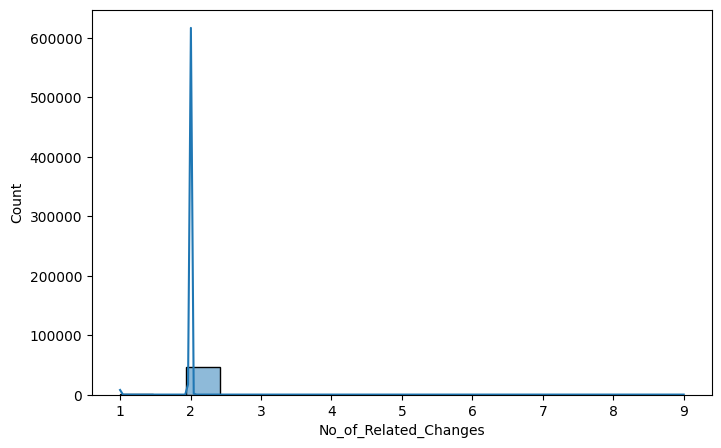

In [ ]:
plt.figure(figsize=(8,5))
sns.histplot(data=data,x='No_of_Related_Changes',kde=True)
plt.show()

### **Insights**
- The graph reveals that most entities experience only a small number of related changes, with the highest frequency observed at 2.
- Cases with more than 3 related changes are rare, and instances beyond 5 are exceptional, possibly signaling outliers or unique conditions.

In [ ]:
Q1=data["No_of_Related_Changes"].quantile(0.25)
print("lower_quartile",Q1)
Q3=data["No_of_Related_Changes"].quantile(0.75)
print("upper_quartile",Q3)

lower_quartile 2.0
upper_quartile 2.0


In [ ]:
IQR=Q3-Q1
IQR

0.0

In [ ]:
lower_limit=Q1-1.5*IQR
print("lower_limit is",lower_limit)
upper_limit=Q3+1.5*IQR
print("upper_limit is",upper_limit)

lower_limit is 2.0
upper_limit is 2.0


In [ ]:
data.loc[data["No_of_Related_Changes"]>upper_limit]

,CI_Name,CI_Cat,CI_Subcat,WBS,Incident_ID,Status,Impact,Urgency,Priority,number_cnt,...,Reopen_Time,Resolved_Time,Close_Time,Handle_Time_hrs,Closure_Code,No_of_Related_Interactions,Related_Interaction,No_of_Related_Incidents,No_of_Related_Changes,Related_Change
360,WBA000124,application,Web Based Application,WBS000088,IM0000433,Closed,4,4,4.0,0.261065,...,NaN,05-12-2013 10:16,05-12-2013 10:17,"6,48,13,36,111",Unknown,1.0,SD0000643,2.0,3.0,#MULTIVALUE
24182,SUB000479,subapplication,Web Based Application,WBS000015,IM0024438,Closed,3,3,3.0,0.870326,...,09-01-2014 15:31,20-01-2014 12:06,20-01-2014 12:06,"8,21,34,44,444",Software,2.0,#MULTIVALUE,2.0,9.0,#MULTIVALUE
42082,WBA000005,application,Web Based Application,WBS000302,IM0042443,Closed,4,4,4.0,0.582007,...,NaN,26-03-2014 16:28,26-03-2014 16:28,"10,78,325",Software,1.0,SD0130449,2.0,3.0,#MULTIVALUE


In [ ]:
len(data.loc[data["No_of_Related_Changes"]>upper_limit])/len(data)

6.43707756678468e-05

In [ ]:
data.loc[data["No_of_Related_Changes"]>upper_limit,"No_of_Related_Changes"]=data["No_of_Related_Changes"].median()

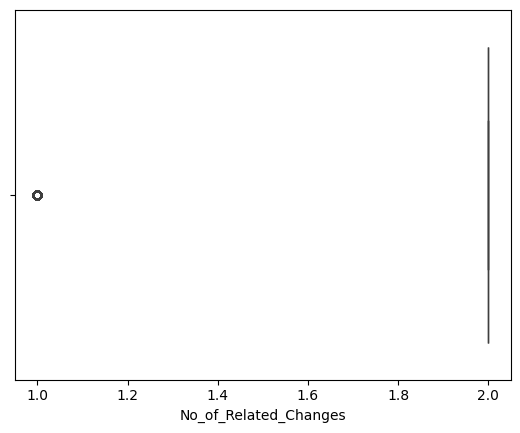

In [ ]:
sns.boxplot(x=data.No_of_Related_Changes)
plt.show()

# **Feature Engineering**

#### **Converting categorical columns to Numeric columns**

In [ ]:
CI_Cat= {
     'application':6,
     'subapplication':5,
      'computer': 4,
      'storage': 3,
      'hardware': 2,
       'software': 1
  }

# Map the 'CI_Cat' column to numeric values
data['CI_Cat'] = data['CI_Cat'].map(CI_Cat)

In [ ]:
data.sample(2)

,CI_Name,CI_Cat,CI_Subcat,WBS,Incident_ID,Status,Impact,Urgency,Priority,number_cnt,...,Reopen_Time,Resolved_Time,Close_Time,Handle_Time_hrs,Closure_Code,No_of_Related_Interactions,Related_Interaction,No_of_Related_Incidents,No_of_Related_Changes,Related_Change
34149,SBA000025,6,Server Based Application,WBS000006,IM0034452,Closed,4,4,4.0,0.549846,...,NaN,07-02-2014 14:11,07-02-2014 14:11,"1,88,91,38,889",Other,1.0,SD0104698,2.0,2.0,NaN
41115,SBA000460,6,Server Based Application,WBS000073,IM0041463,Closed,4,4,4.0,0.424254,...,NaN,06-03-2014 08:53,06-03-2014 08:53,"4,91,16,66,667",Data,1.0,SD0126954,2.0,2.0,NaN


In [ ]:
category_mapping = {
    'Server Based Application': 1,
    'Web Based Application': 2,
    'Desktop Application': 3,
    'System Software': 4,
    'Laptop': 5,
    'Banking Device': 6,
    'Client Based Application': 7,
    'Database': 8,
    'SAN': 9,
    'Monitor': 10,
    'Controller': 11,
    'Exchange': 12,
    'Printer': 13,
    'Scanner': 14,
    'Switch': 15,
    'Network Component': 16,
    'Keyboard': 17
}

data['CI_Subcat'] = data['CI_Subcat'].map(category_mapping)

In [ ]:
data.sample(2)

,CI_Name,CI_Cat,CI_Subcat,WBS,Incident_ID,Status,Impact,Urgency,Priority,number_cnt,...,Reopen_Time,Resolved_Time,Close_Time,Handle_Time_hrs,Closure_Code,No_of_Related_Interactions,Related_Interaction,No_of_Related_Incidents,No_of_Related_Changes,Related_Change
425,SBA000033,6,1,WBS000086,IM0000503,Closed,5,5,5.0,0.708097,...,13-09-2013 15:17,04-10-2013 09:50,04-10-2013 09:50,"9,35,95,27,778",Other,4.0,#MULTIVALUE,2.0,2.0,NaN
20001,SBA000607,6,1,WBS000263,IM0020230,Closed,4,4,4.0,0.232602,...,NaN,11-12-2013 13:01,11-12-2013 13:02,"1,82,12,77,778",Other,1.0,SD0059462,2.0,2.0,NaN


In [ ]:
# Define a mapping for the 'Status' column
status_mapping = {
    'Closed': 1,
    'Work in progress': 0
}

# Map the 'Status' column to numeric values
data['Status'] =data['Status'].map(status_mapping)


In [ ]:
data.sample(2)

,CI_Name,CI_Cat,CI_Subcat,WBS,Incident_ID,Status,Impact,Urgency,Priority,number_cnt,...,Reopen_Time,Resolved_Time,Close_Time,Handle_Time_hrs,Closure_Code,No_of_Related_Interactions,Related_Interaction,No_of_Related_Incidents,No_of_Related_Changes,Related_Change
34986,CBA000014,6,7,WBS000073,IM0035291,1,4,4,4.0,0.842155,...,NaN,11-02-2014 11:46,11-02-2014 11:47,"1,56,91,38,889",Software,1.0,SD0107175,2.0,2.0,NaN
33137,SBA000394,6,1,WBS000185,IM0033435,1,3,3,3.0,0.734426,...,NaN,03-02-2014 15:23,03-02-2014 15:23,"0,388333333",Software,1.0,SD0101924,2.0,2.0,NaN


In [ ]:
Impact_mapping={
    "4":5,
    "5":4,
    "3":3,
    "NS":2,
    "2":1,
    "1":0
}
data["Impact"]=data["Impact"].map(Impact_mapping)

In [ ]:
data.sample()

,CI_Name,CI_Cat,CI_Subcat,WBS,Incident_ID,Status,Impact,Urgency,Priority,number_cnt,...,Reopen_Time,Resolved_Time,Close_Time,Handle_Time_hrs,Closure_Code,No_of_Related_Interactions,Related_Interaction,No_of_Related_Incidents,No_of_Related_Changes,Related_Change
27507,HMD000017,2,8,WBS000285,IM0027779,1,5,4,4.0,0.619684,...,NaN,15-01-2014 17:26,15-01-2014 17:26,"0,559722222",Other,1.0,SD0083771,2.0,2.0,NaN


In [ ]:
Category_mapping={
    "incident":2,
    "request for information":1,
    "complaint":0,
    "request for change":0
}
data["Category"]=data["Category"].map(Category_mapping)

In [ ]:
data.sample(2)

,CI_Name,CI_Cat,CI_Subcat,WBS,Incident_ID,Status,Impact,Urgency,Priority,number_cnt,...,Reopen_Time,Resolved_Time,Close_Time,Handle_Time_hrs,Closure_Code,No_of_Related_Interactions,Related_Interaction,No_of_Related_Incidents,No_of_Related_Changes,Related_Change
43253,SBA000054,6,1,WBS000013,IM0043629,1,3,3,3.0,0.295502,...,NaN,14-03-2014 11:37,14-03-2014 11:37,"0,392777778",Unknown,1.0,SD0134210,2.0,2.0,NaN
5868,CBD000399,4,6,WBS000146,IM0006014,0,2,3,4.0,0.793529,...,NaN,16-10-2013 13:41,16-10-2013 13:41,"0,625",Hardware,1.0,SD0015040,2.0,2.0,NaN


In [ ]:
# Define a mapping dictionary
closure_code_mapping = {
    'Overig': 0,
    'Kwaliteit van de output': 1,
    'Questions': 2,
    'Referred': 3,
    'Inquiry': 4,
    'other': 5,
    'User manual not used': 6,
    'Operator error': 7,
    'Unknown': 8,
    'Data': 9,
    'Hardware': 10,
    'No error - works as designed': 11,
    'User error': 12,
    'Software': 13,
    'Other': 14
}

# Map the 'Closure_Code' column to numeric values
data['Closure_Code'] = data['Closure_Code'].map(closure_code_mapping)

In [ ]:
data.sample(2)

,CI_Name,CI_Cat,CI_Subcat,WBS,Incident_ID,Status,Impact,Urgency,Priority,number_cnt,...,Reopen_Time,Resolved_Time,Close_Time,Handle_Time_hrs,Closure_Code,No_of_Related_Interactions,Related_Interaction,No_of_Related_Incidents,No_of_Related_Changes,Related_Change
19421,SAN000178,3,9,WBS000128,IM0019647,1,4,5,5.0,0.701718,...,NaN,06-12-2013 08:58,06-12-2013 08:58,"0,007777778",13,1.0,SD0057301,2.0,2.0,NaN
3345,SAP000003,6,4,WBS000271,IM0003465,1,5,4,4.0,0.126594,...,NaN,09-10-2013 08:43,09-10-2013 08:43,"7,25,97,22,222",14,1.0,SD0007640,2.0,2.0,NaN


##### **Converting Datatype float to int**

In [ ]:
data.Priority=data["Priority"].astype("int32")

In [ ]:
data.No_of_Reassignments=data["No_of_Reassignments"].astype("int32")

In [ ]:
data.No_of_Related_Interactions=data["No_of_Related_Interactions"].astype("int32")

In [ ]:
data.sample(2)

,CI_Name,CI_Cat,CI_Subcat,WBS,Incident_ID,Status,Impact,Urgency,Priority,number_cnt,...,Reopen_Time,Resolved_Time,Close_Time,Handle_Time_hrs,Closure_Code,No_of_Related_Interactions,Related_Interaction,No_of_Related_Incidents,No_of_Related_Changes,Related_Change
35066,SBA000464,6,1,WBS000073,IM0035371,1,5,4,4,0.511854,...,NaN,10-02-2014 10:28,10-02-2014 10:28,"1,37,30,55,556",9,1,SD0107238,2.0,2.0,NaN
19066,SUB000456,5,2,WBS000073,IM0019291,1,2,3,4,0.919940,...,NaN,05-12-2013 07:39,05-12-2013 07:39,"0,538333333",14,1,SD0055927,2.0,2.0,NaN


## **Data Visualization**

### **Uni-Variate Analysis**

In [ ]:
# defining the function for ploting
def plot_count(x, data, title=None, xlabel=None, ylabel=None):
    plt.figure(figsize=(10, 8))
    sns.countplot(x=x, data=data)  # Replaced 'data' with 'data'
    plt.title(title if title else f'{x} vs Count', fontsize=16)
    plt.xticks(rotation=90)
    plt.xlabel(xlabel if xlabel else x.upper(), fontsize=12)
    plt.ylabel(ylabel if ylabel else 'COUNT', fontsize=12)
    plt.show()




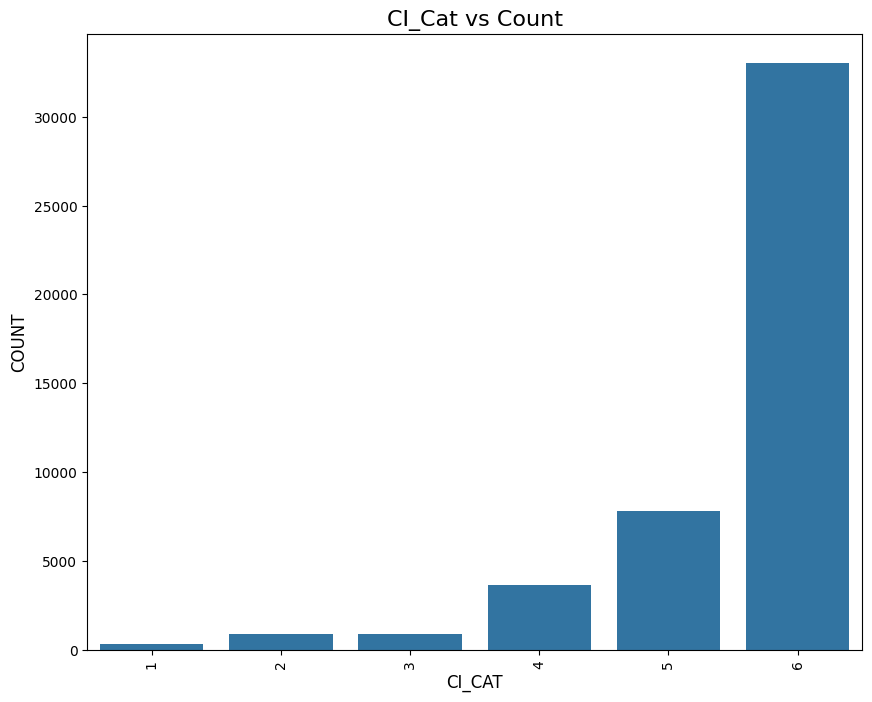

In [ ]:
plot_count('CI_Cat', data, title=None, xlabel=None, ylabel=None)

**The Cl_Cat variable shows a highly imbalanced distribution, with category 6 dominating the count, while categories 1, 2, and 3 have minimal representation.**

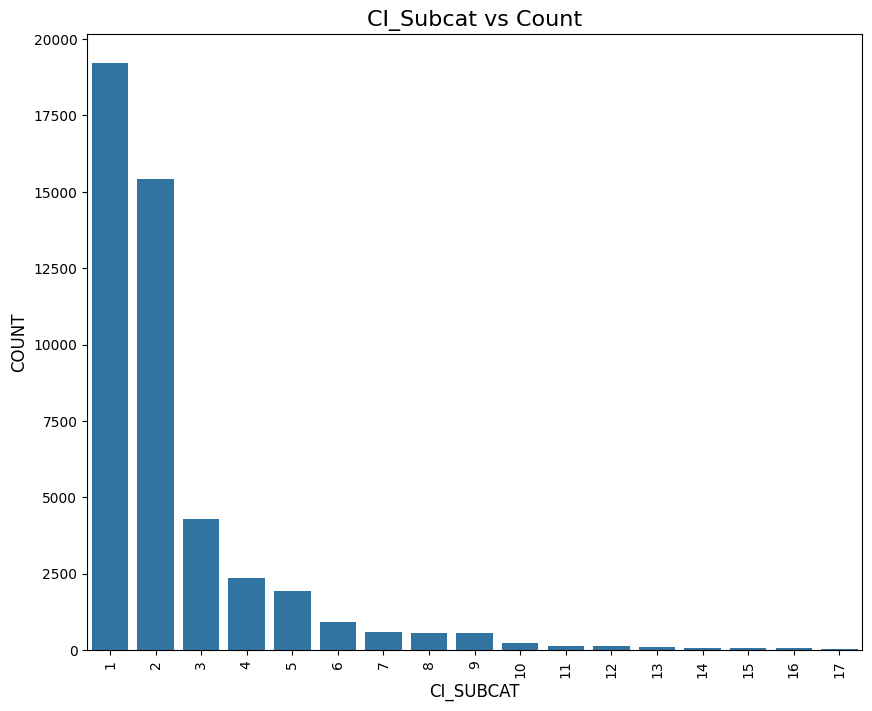

In [ ]:
plot_count('CI_Subcat', data, title=None, xlabel=None, ylabel=None)

**The Cl_Subcat variable is highly imbalanced, with most data concentrated in subcategories 1 and 2, while others have very low counts**

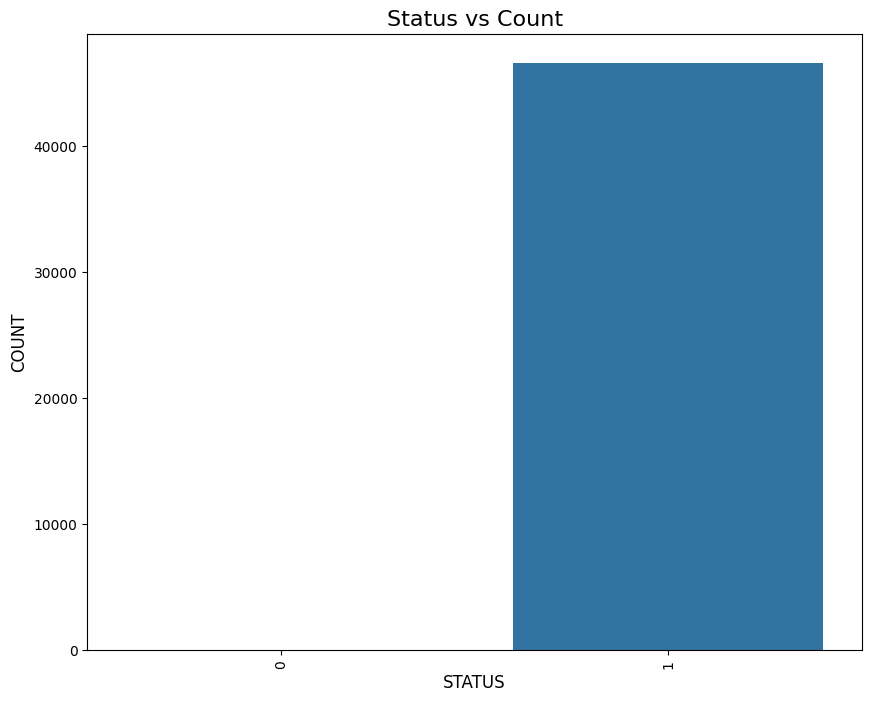

In [ ]:
plot_count('Status', data, title=None, xlabel=None, ylabel=None)

**The Status variable is highly imbalanced, with the majority of the data belonging to category 1 and very few instances in category 0.**

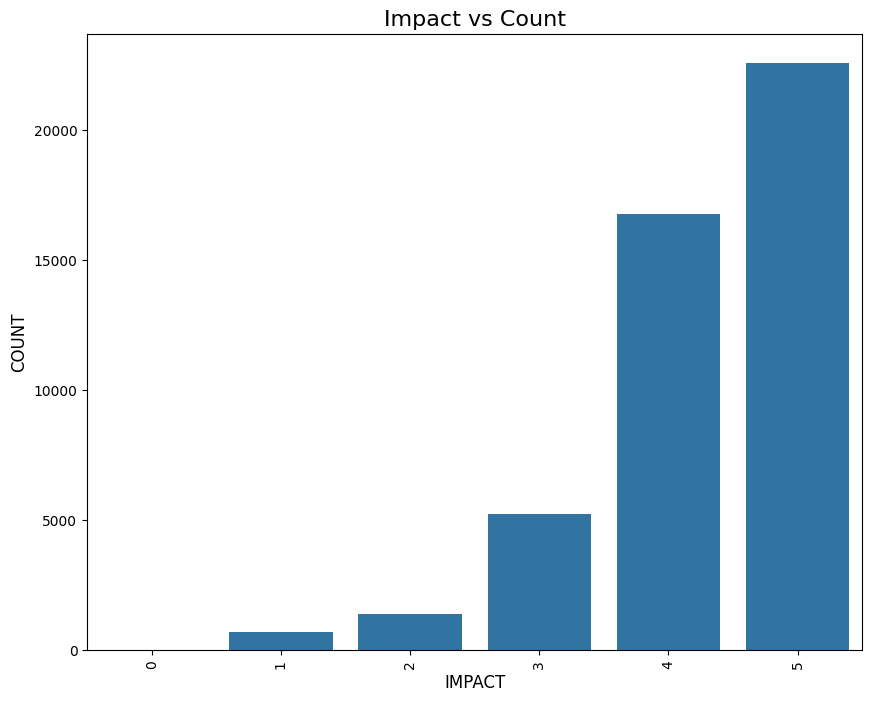

In [ ]:
plot_count('Impact', data, title=None, xlabel=None, ylabel=None)

**The chart shows that the majority of instances have high "IMPACT" values, with 4 and 5 being the most frequent categories. Lower "IMPACT" levels (0, 1, 2) occur much less frequently, indicating a strong skew toward higher impact levels.**

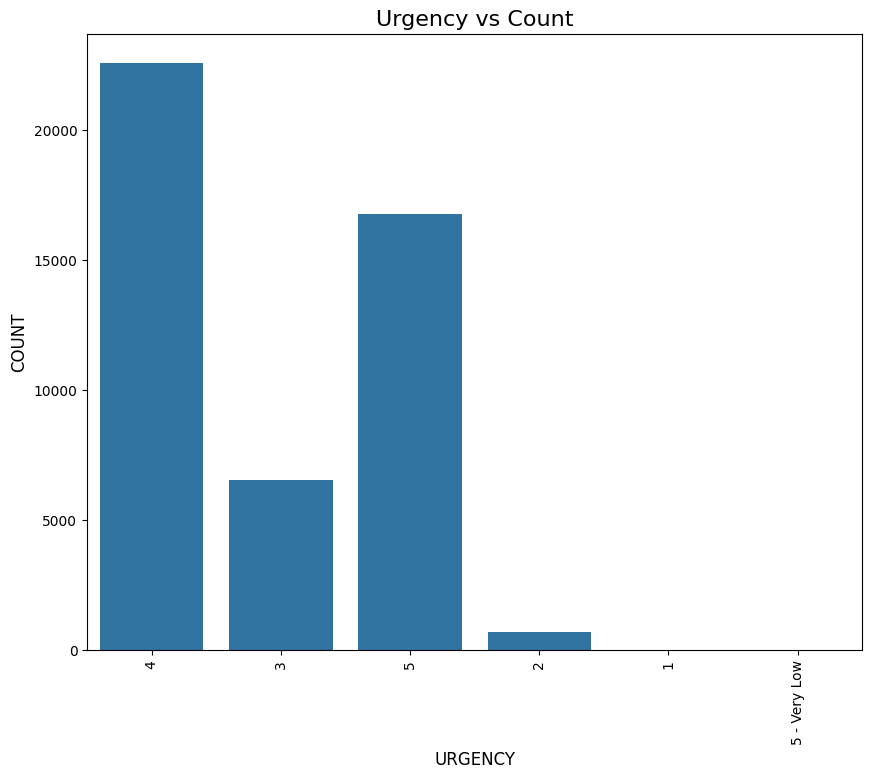

In [ ]:
plot_count('Urgency', data, title=None, xlabel=None, ylabel=None)


**The data is skewed toward higher urgency levels, with level 4 being the most frequent, followed by level 5. Lower urgency levels (1, 2, and 3) are much less common.**

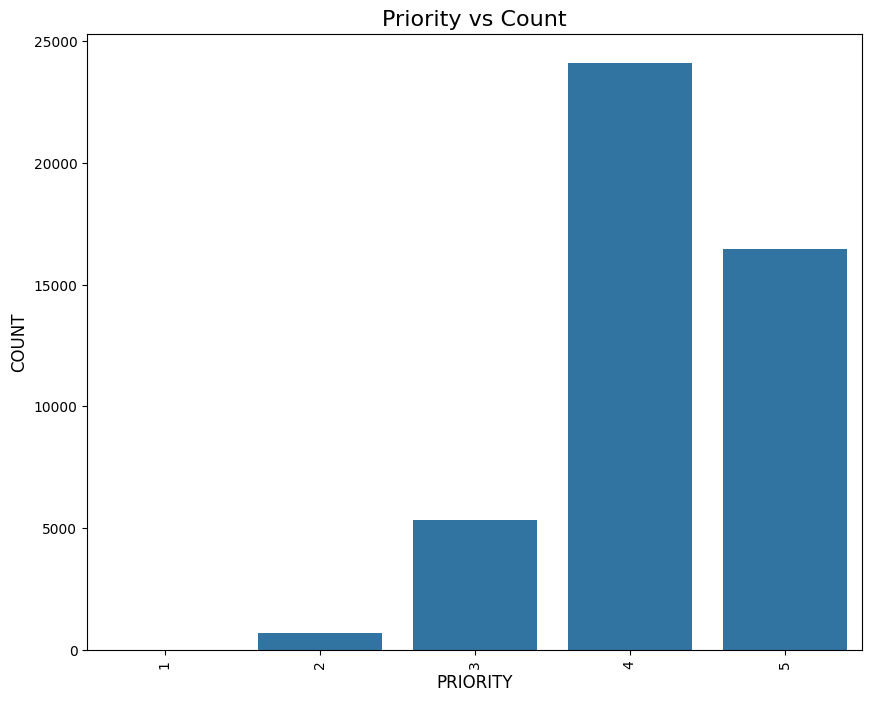

In [ ]:
plot_count('Priority', data, title=None, xlabel=None, ylabel=None)


**The data is skewed toward higher priority levels, with level 4 being the most frequent, followed by level 5. Lower priority levels (1, 2, and 3) are rare.**

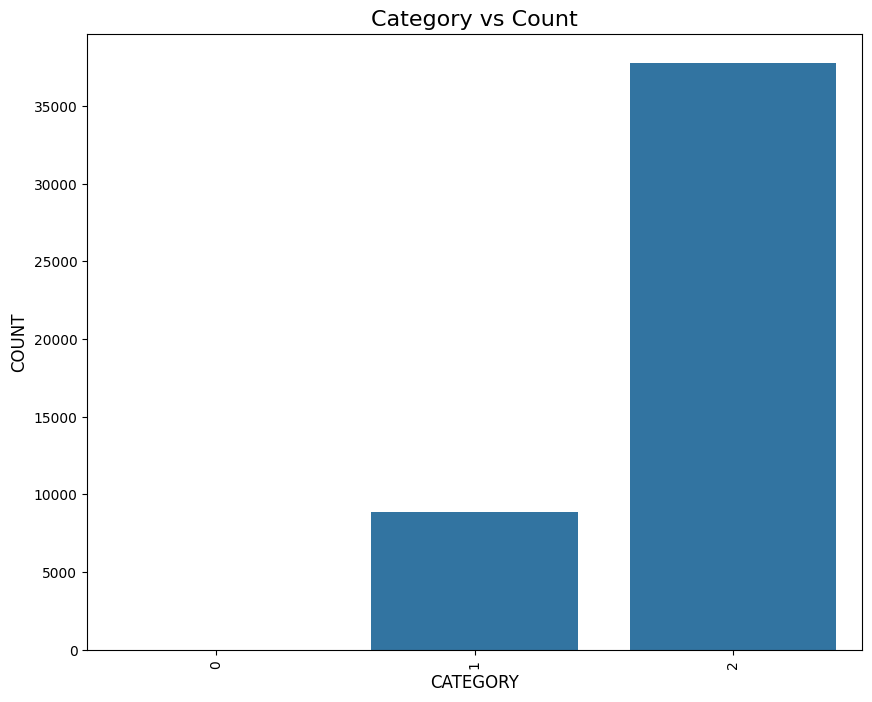

In [ ]:
plot_count('Category', data, title=None, xlabel=None, ylabel=None)

**The data is highly imbalanced, with Category 2 dominating the counts, while Category 1 has moderate representation, and Category 0 has negligible presence.**

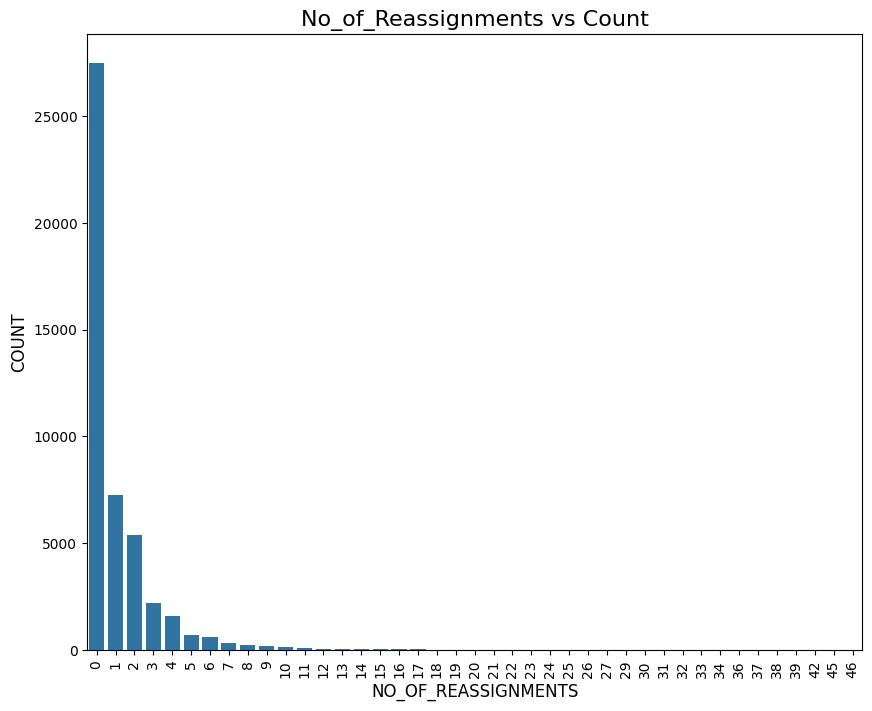

In [ ]:
plot_count('No_of_Reassignments', data, title=None, xlabel=None, ylabel=None)

**Most tasks have no reassignments, with the count dropping sharply as reassignments increase. Very few tasks have more than 5 reassignments, making reassignments rare overall.**

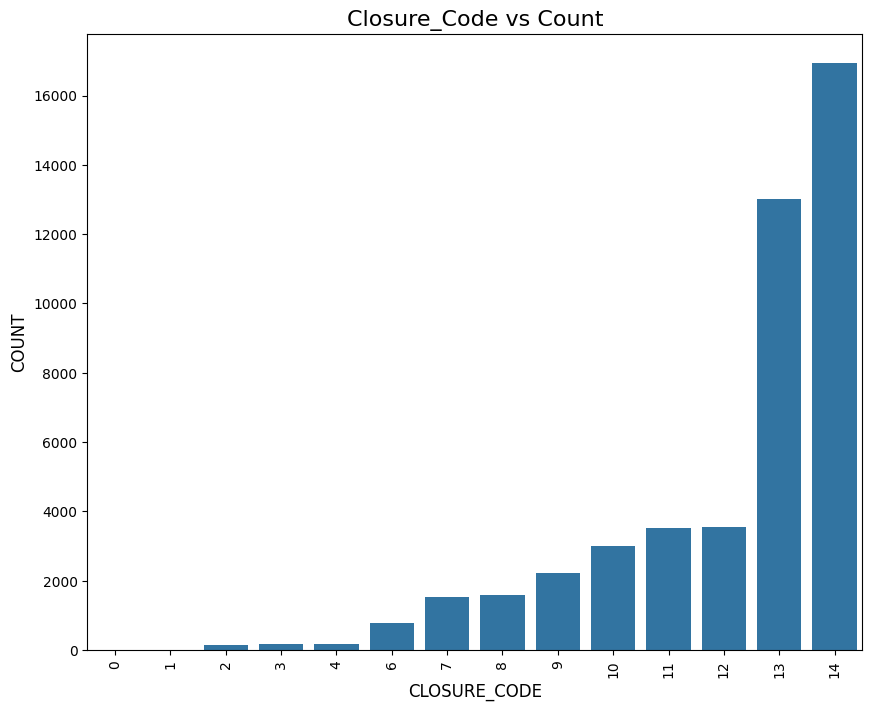

In [ ]:
plot_count('Closure_Code', data, title=None, xlabel=None, ylabel=None)

**Closure codes 13 and 14 dominate the data, with significant counts, while codes 11 and 12 have moderate counts. Most other codes have minimal occurrences.**

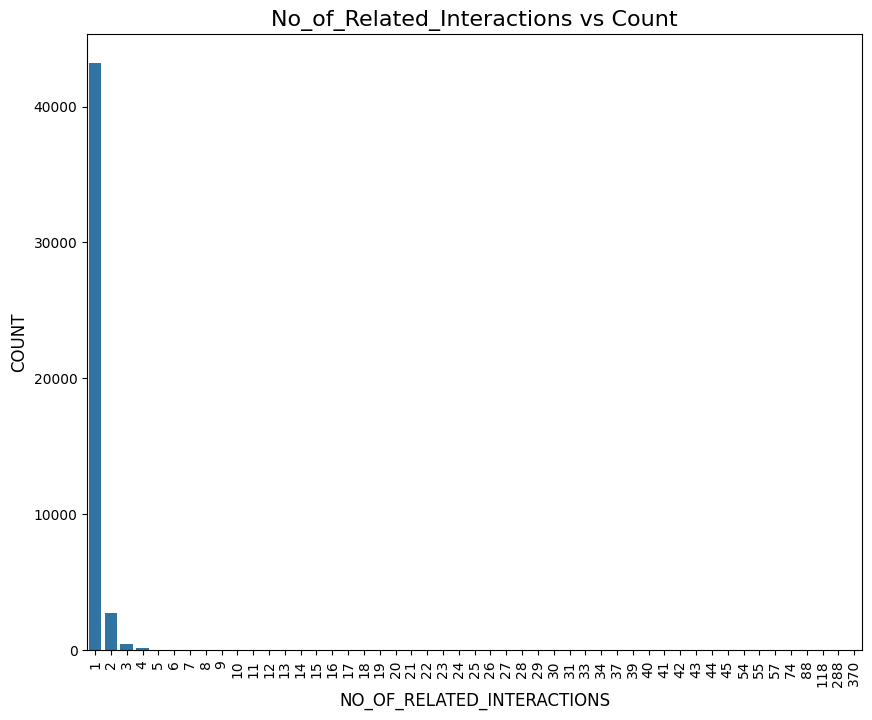

In [ ]:
plot_count('No_of_Related_Interactions', data, title=None, xlabel=None, ylabel=None)

**The data shows that most interactions are concentrated at very low numbers, with a sharp drop-off as the number of interactions increases. A few outliers have very high interaction counts, indicating a long-tailed distribution.**






### **Conclusion for Uni-Variate Analysis :**
The data is highly imbalanced, with most instances concentrated in **specific categories, subcategories, and higher levels of impact, urgency, and priority.** Tasks are typically resolved efficiently, with minimal reassignments, and a few key closure codes (like 13 and 14) dominate resolutions. Lower categories, statuses, and interactions are rare, while a small number of outliers show unusually high activity, indicating a focus on handling critical and high-impact tasks.

### **Bi-Variate Analysis**

In [ ]:
def plot_count(x, data, y='Priority', title=None, hue='Priority', xlabel=None, ylabel='Priority'):
    plt.figure(figsize=(10, 8))
    sns.countplot(x=x, data=data, hue=hue)  # Adjusted: Use 'x' as the categorical variable
    plt.title(title if title else f'{x} vs Priority', fontsize=16)
    plt.xticks(rotation=90)
    plt.xlabel(xlabel if xlabel else x.upper(), fontsize=12)
    plt.ylabel(ylabel=ylabel, fontsize=12)
    plt.show()




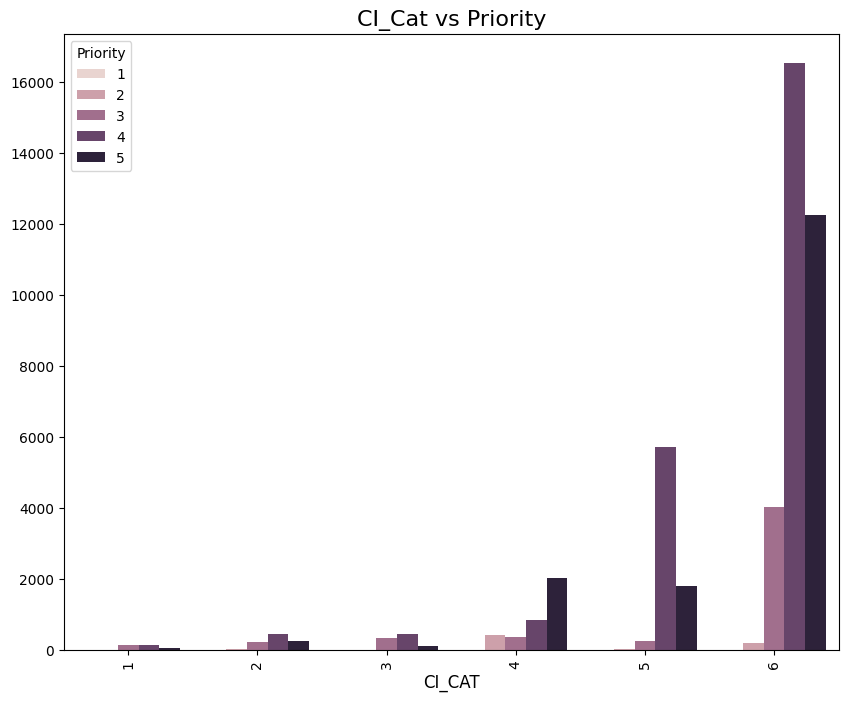

In [ ]:
plot_count('CI_Cat', data,y='Priority', title=None, xlabel=None, ylabel=None)

**The majority of the data is concentrated in categories 6 and 5, especially for higher priorities (4 and 5). The other categories (1–4) have minimal representation, suggesting they are less relevant or occur less frequently.**

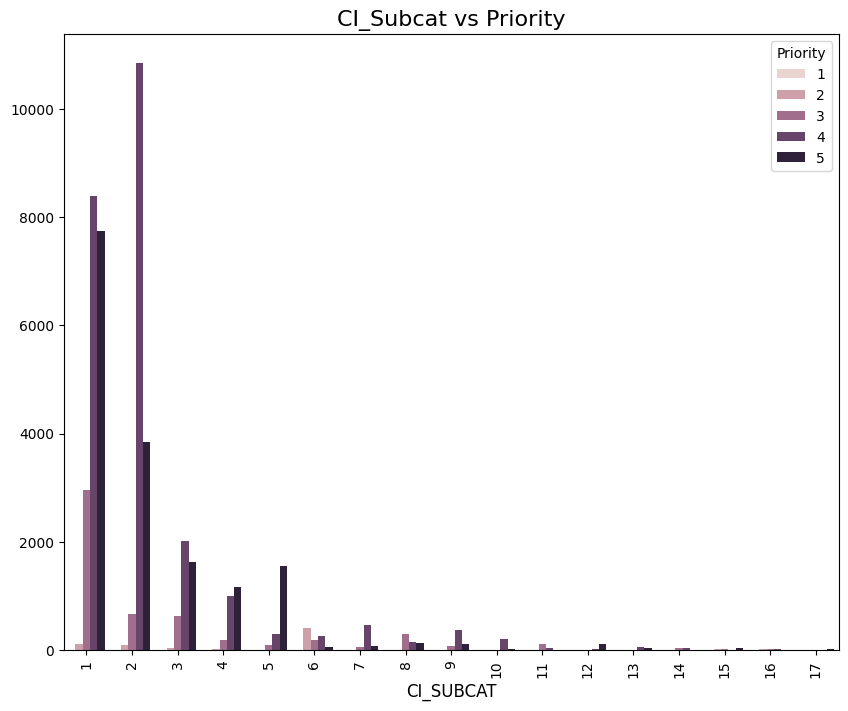

In [ ]:
plot_count('CI_Subcat', data,y='Priority', title=None, xlabel=None, ylabel=None)

**The data is highly concentrated in subcategories 1 and 2, particularly in higher priorities. Other subcategories are either moderately represented (3–6) or rare (7 and above).**

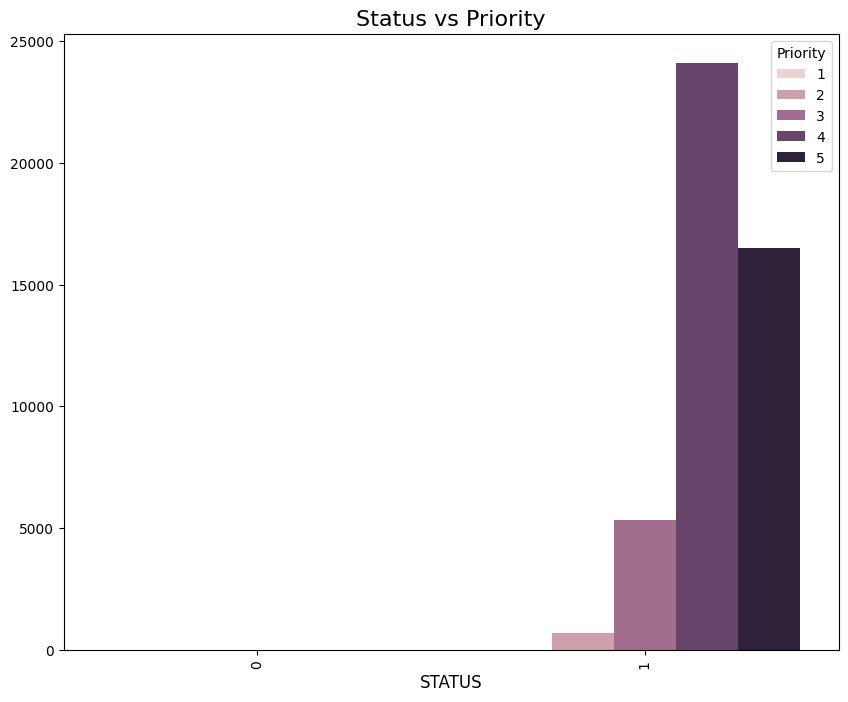

In [ ]:
plot_count('Status', data,y='Priority', title=None, xlabel=None, ylabel=None)

**Most of the data is linked to STATUS 1, with a high count across all priority levels. STATUS 0 is rare, showing very low counts. This means most actions or events happen under STATUS 1.**

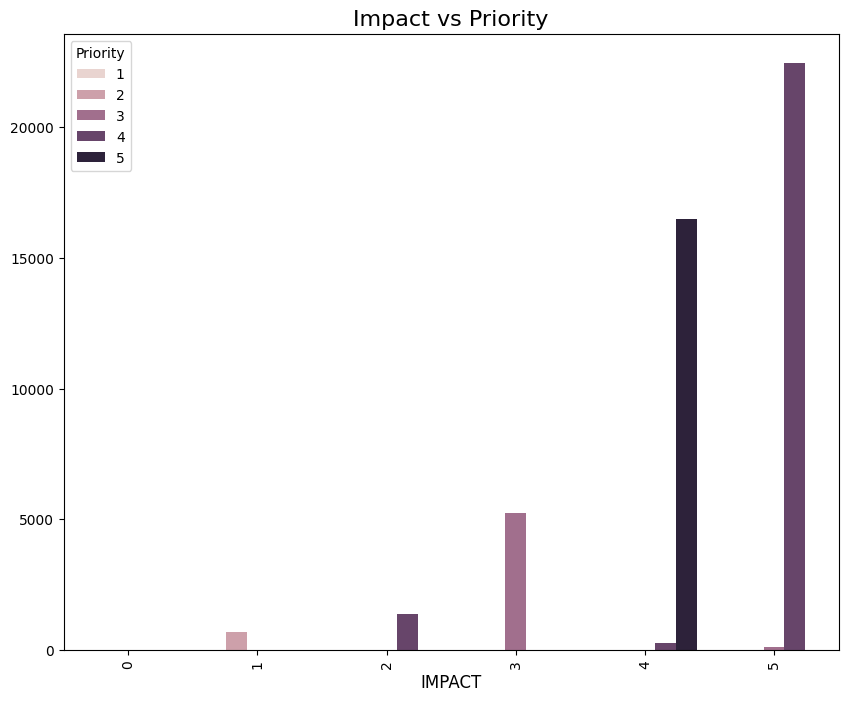

In [ ]:
plot_count('Impact', data,y='Priority', title=None, xlabel=None, ylabel=None)

**The graph indicates that IMPACT 5 and IMPACT 4 dominate the data, with significantly higher counts. Lower impacts (1, 2, and 3) are much less frequent, suggesting most events or actions have a high impact**

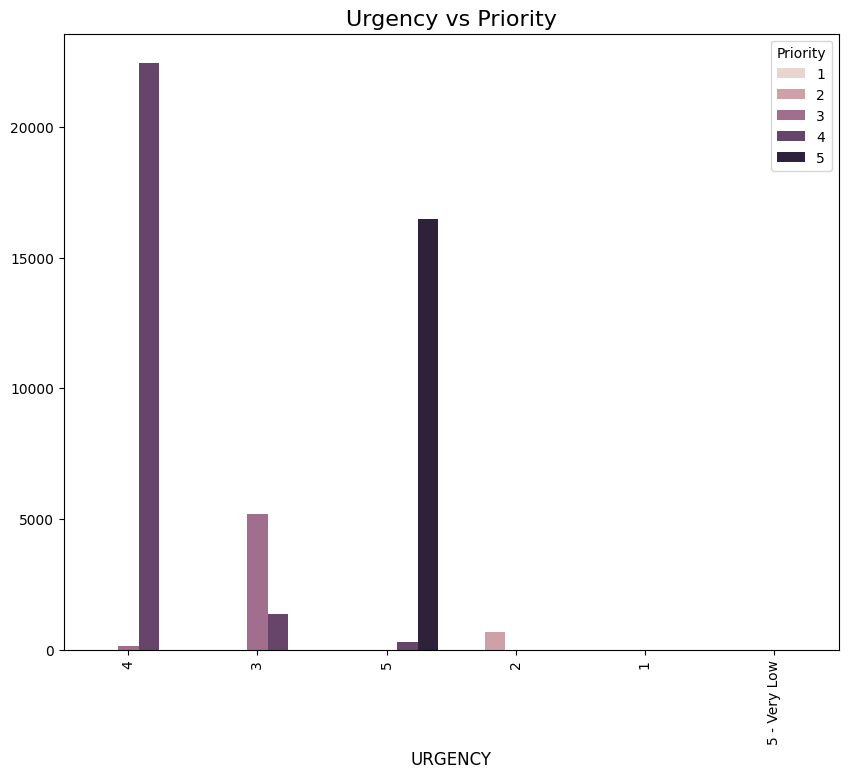

In [ ]:
plot_count('Urgency', data,y='Priority', title=None, xlabel=None, ylabel=None)

**The graph shows that URGENCY 4 and URGENCY 5 dominate the data, indicating that higher urgency levels are the most common. Lower urgency levels (1, 2, and 3) have significantly fewer occurrences, suggesting that most events or actions are classified as highly urgent.**

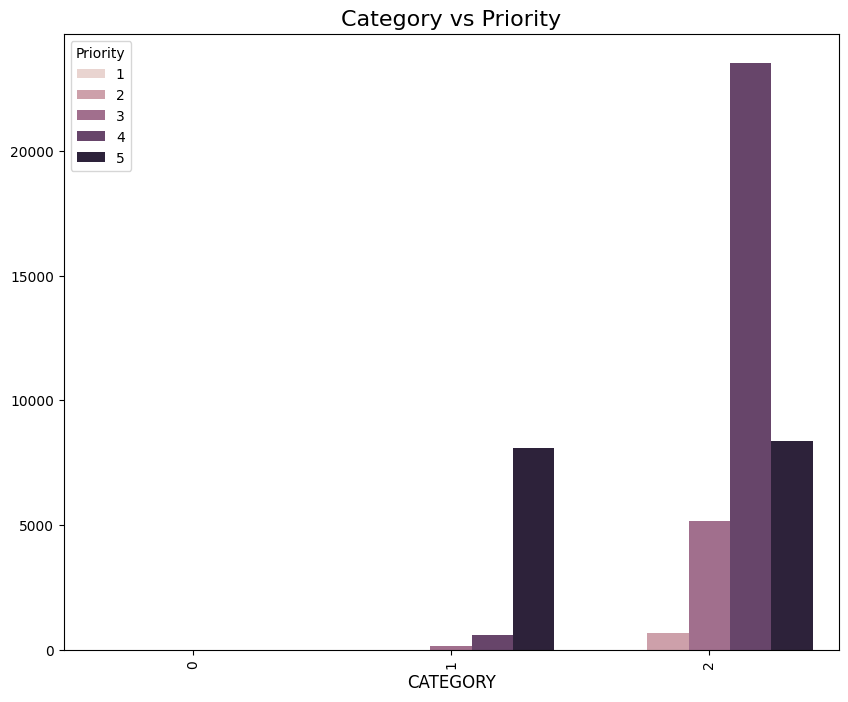

In [ ]:
plot_count('Category', data,y='Priority', title=None, xlabel=None, ylabel=None)

**Category 2 dominates the dataset with the highest counts across all priorities, especially for higher priorities (3, 4, and 5). Categories 1 and 0 have minimal representation, indicating possible imbalance or lower relevance.**

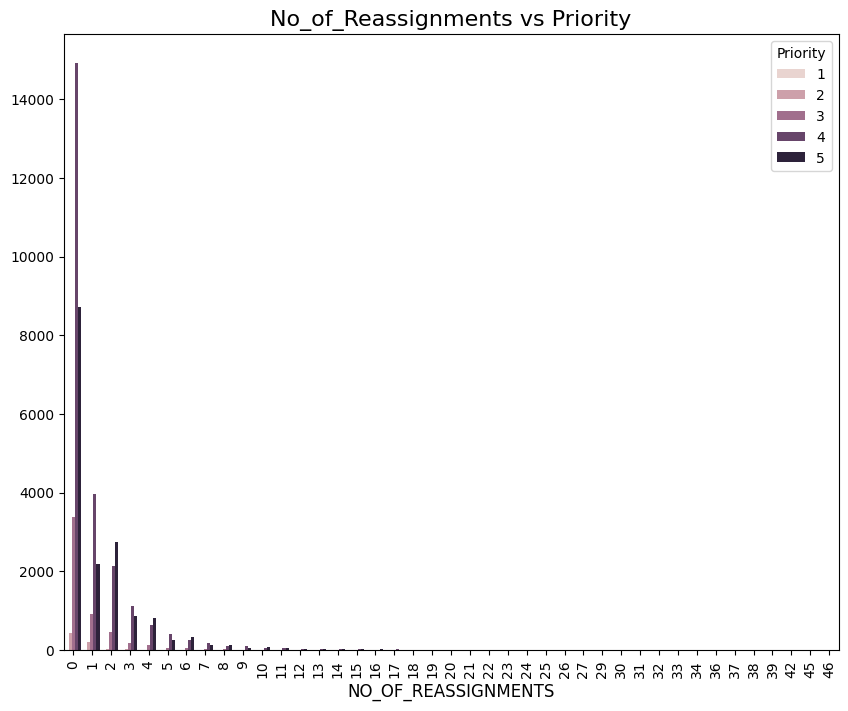

In [ ]:
plot_count('No_of_Reassignments', data,y='Priority', title=None, xlabel=None, ylabel=None)

**Most tasks are resolved quickly with 0–1 reassignment, showing efficient processes. Tasks with many reassignments are rare and likely involve complex problems.**

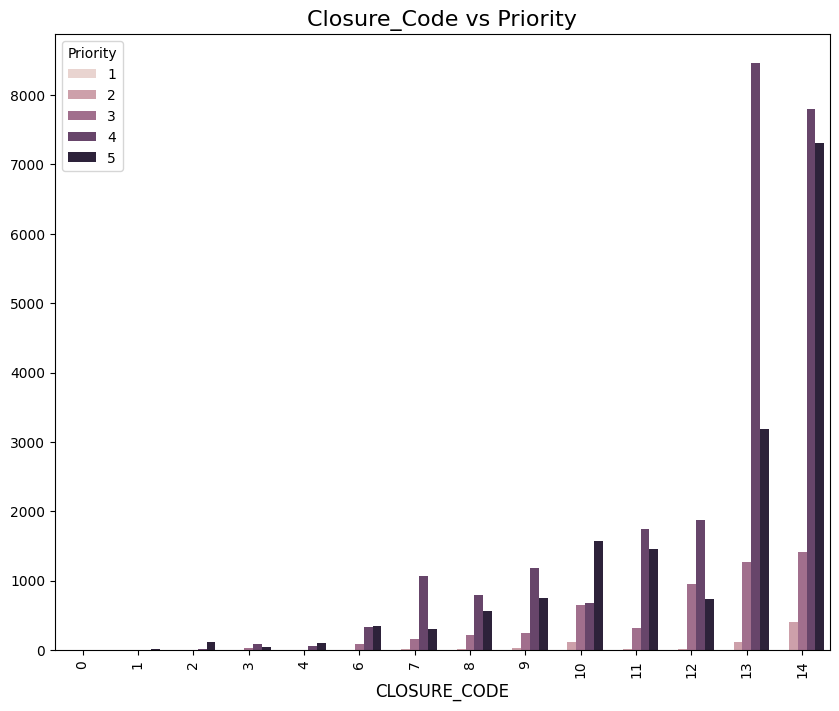

In [ ]:
plot_count('Closure_Code', data,y='Priority', title=None, xlabel=None, ylabel=None)

**Closure codes 13 and 14 are the most commonly used, resolving the majority of tasks, especially higher-priority ones. Other codes, like 7, 8, and 12, are used moderately, while the rest are rarely applied, indicating a focus on a few key resolution methods.**

### **Conclusion for BI-Variate Analysis :**

The data shows that most events and tasks are concentrated in **specific categories, statuses, impacts, and urgency levels, with higher priorities, impacts, and urgencies dominating.** Tasks are often resolved efficiently with minimal reassignment, and resolution heavily relies on a few key closure codes, like 13 and 14. Lower-priority categories, statuses, and impacts are rare, indicating the focus is on addressing critical and urgent issues efficiently.

### **Feature Selection**

In [ ]:
# Creating the copy fo the dataset
data1=data.copy()

In [ ]:
data1.sample(2)

,CI_Name,CI_Cat,CI_Subcat,WBS,Incident_ID,Status,Impact,Urgency,Priority,number_cnt,...,Reopen_Time,Resolved_Time,Close_Time,Handle_Time_hrs,Closure_Code,No_of_Related_Interactions,Related_Interaction,No_of_Related_Incidents,No_of_Related_Changes,Related_Change
32030,SBA000172,6,1,WBS000014,IM0032322,1,5,4,4,0.500613,...,NaN,31-01-2014 13:49,31-01-2014 13:49,"2,00,23,61,111",14,1,SD0098019,2.0,2.0,NaN
39014,CBD000013,4,6,WBS000147,IM0039340,1,4,5,5,0.196570,...,NaN,28-02-2014 09:58,28-02-2014 09:58,"3,21,13,33,333",8,1,SD0120023,2.0,2.0,NaN


In [ ]:
# Dropping the columns which has least importance
data1.drop(["CI_Name",'Related_Interaction','Reopen_Time','KB_number','Alert_Status',"WBS", "Incident_ID","Urgency","No_of_Reassignments","No_of_Related_Incidents","No_of_Related_Changes","Open_Time","Resolved_Time","Close_Time","Handle_Time_hrs",'Related_Change'], axis=1, inplace=True)

In [ ]:
data1.columns

Index(['CI_Cat', 'CI_Subcat', 'Status', 'Impact', 'Priority', 'number_cnt',
       'Category', 'Closure_Code', 'No_of_Related_Interactions'],
      dtype='object')

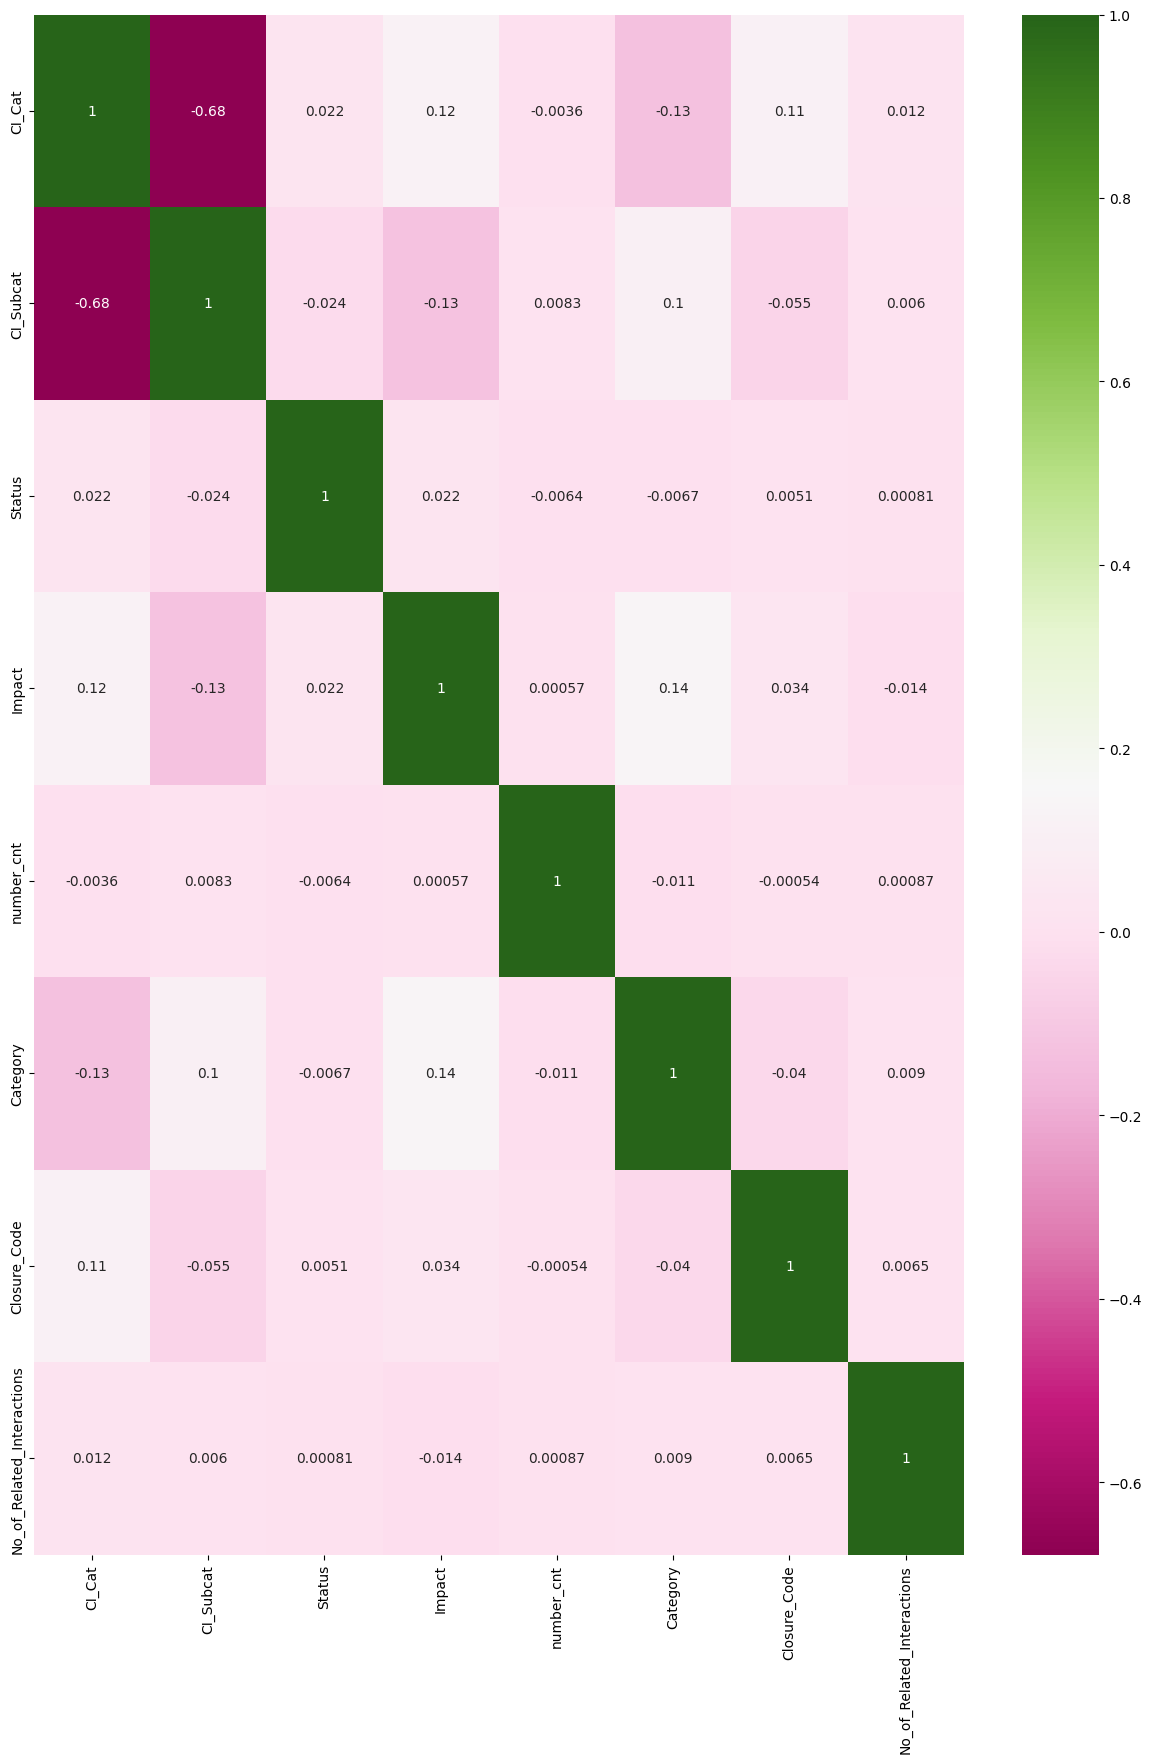

In [ ]:
#Using Pearson Correlation
plt.figure(figsize=(15,20))
cor = data1.drop("Priority",axis=1).corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.PiYG)
plt.show()

## **1. Predicting High Priority Tickets**

In [ ]:
data.columns

Index(['CI_Name', 'CI_Cat', 'CI_Subcat', 'WBS', 'Incident_ID', 'Status',
       'Impact', 'Urgency', 'Priority', 'number_cnt', 'Category', 'KB_number',
       'Alert_Status', 'No_of_Reassignments', 'Open_Time', 'Reopen_Time',
       'Resolved_Time', 'Close_Time', 'Handle_Time_hrs', 'Closure_Code',
       'No_of_Related_Interactions', 'Related_Interaction',
       'No_of_Related_Incidents', 'No_of_Related_Changes', 'Related_Change'],
      dtype='object')

### **Feature Selection**

Only the features which are available when the tickets arrives can be used to predict priority. Therefore, we have used only 4 predictors.

In [ ]:
# Splitting data into x and y
X = data.loc[:,['CI_Cat','CI_Subcat','WBS','Category']]
y = data.Priority

In [ ]:
X.sample(10)

,CI_Cat,CI_Subcat,WBS,Category
35157,6,1,WBS000209,1
2232,5,2,WBS000015,2
43476,5,1,WBS000095,1
17387,6,1,WBS000263,2
8845,6,1,WBS000263,1
32484,1,4,WBS000089,2
18054,6,2,WBS000073,2
19158,5,2,WBS000073,2
19921,2,8,WBS000267,2
22757,6,1,WBS000128,2


In [ ]:
# Label Encoding
enc= LabelEncoder()
for i in (0,1,2,3):
    X.iloc[:,i] = enc.fit_transform(X.iloc[:,i])

In [ ]:
# Splitting the data into test and train for calculating accuracy
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=10)

In [ ]:
# Standardization technique
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
X_train.shape

(32623, 4)

In [ ]:
X_test.shape

(13982, 4)

# **Model Iteration**

### **1. Random Forest Classifier**

In [ ]:
#Training the model
model_rf = RandomForestClassifier(max_depth=27)
model_rf.fit(X_train,y_train)

RandomForestClassifier(max_depth=27)

              precision    recall  f1-score   support

           1       0.00      0.00      0.00         2
           2       0.50      0.64      0.56       204
           3       0.65      0.62      0.63      1528
           4       0.82      0.88      0.85      7292
           5       0.88      0.81      0.84      4956

    accuracy                           0.82     13982
   macro avg       0.57      0.59      0.58     13982
weighted avg       0.82      0.82      0.82     13982



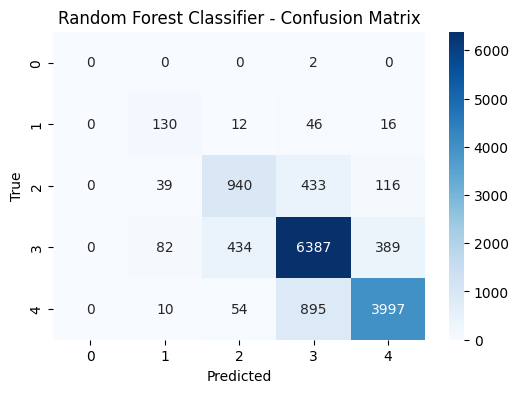

Train F1 Score (Micro) for Random Forest Classifier Classifier is : 0.8194218802685223
Test F1 Score (Micro) for Random Forest Classifier is : 0.8191961092833643
The Roc_Auc score for Random Forest Classifier is : 0.8328344829646024


In [ ]:
# Predicting the model
y_predict_rf_test = model_rf.predict(X_test)
y_predict_rf_train = model_rf.predict(X_train)
# Classification report for test set
print(classification_report(y_test, y_predict_rf_test))

# Confusion matrix
cm = confusion_matrix(y_test, y_predict_rf_test)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Random Forest Classifier - Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# F1 scores for training and testing datasets using micro average
train_score_1 = f1_score(y_train, y_predict_rf_train , average='micro')
score_1 = f1_score(y_test, y_predict_rf_test, average='micro')

# Print F1 scores
print('Train F1 Score (Micro) for Random Forest Classifier Classifier is : {}'.format(train_score_1))
print('Test F1 Score (Micro) for Random Forest Classifier is : {}'.format(score_1))



# Print roc auc scores for multi-class
roc_auc = roc_auc_score(y_test, model_rf.predict_proba(X_test), multi_class='ovr')
print('The Roc_Auc score for Random Forest Classifier is : {}'.format(roc_auc))



### **2. XGBoost Classifier**

In [ ]:
from xgboost import XGBClassifier


# Adjusting class labels in y_train and y_test
y_train_adjusted = y_train - 1
y_test_adjusted = y_test - 1

# Training the model
model_xgb = XGBClassifier(max_depth=27)
model_xgb.fit(X_train, y_train_adjusted)

# Making predictions
y_predict_xgb_test = model_xgb.predict(X_test)
y_predict_xgb_train = model_xgb.predict(X_train)


              precision    recall  f1-score   support

           0       0.00      0.00      0.00         2
           1       0.49      0.63      0.55       204
           2       0.65      0.61      0.63      1528
           3       0.82      0.87      0.84      7292
           4       0.88      0.80      0.84      4956

    accuracy                           0.81     13982
   macro avg       0.57      0.58      0.57     13982
weighted avg       0.82      0.81      0.81     13982



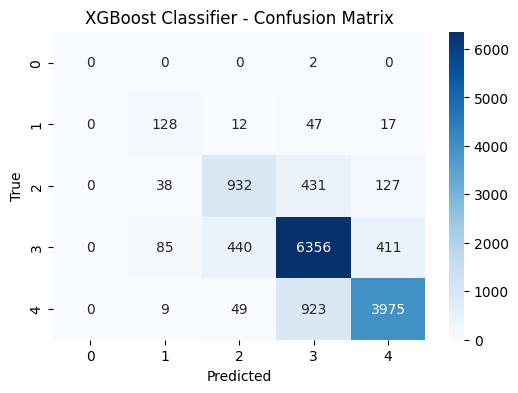

Train F1 Score (Micro) for XGBoost Classifier is : 0.8125862121815897
Test F1 Score (Micro) for XGBoost Classifier is : 0.8146903161207266
The ROC AUC score for XGBoost Classifier is : 0.8571175770469036


In [ ]:

# Classification report for test set
print(classification_report(y_test_adjusted, y_predict_xgb_test))

# Confusion matrix
cm = confusion_matrix(y_test_adjusted, y_predict_xgb_test)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('XGBoost Classifier - Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# F1 scores for training and testing datasets using micro average
train_score_1 = f1_score(y_train_adjusted, y_predict_xgb_train, average='micro')
score_1 = f1_score(y_test_adjusted, y_predict_xgb_test, average='micro')

# Print F1 scores
print('Train F1 Score (Micro) for XGBoost Classifier is : {}'.format(train_score_1))
print('Test F1 Score (Micro) for XGBoost Classifier is : {}'.format(score_1))

# Print ROC AUC scores for multi-class
roc_auc = roc_auc_score(y_test_adjusted, model_xgb.predict_proba(X_test), multi_class='ovr')
print('The ROC AUC score for XGBoost Classifier is : {}'.format(roc_auc))


### **3. Decision Tree Classifier**

In [ ]:
# Training the model
from sklearn.tree import DecisionTreeClassifier
model_dtree=DecisionTreeClassifier()
model_dtree.fit(X_train,y_train)

DecisionTreeClassifier()

              precision    recall  f1-score   support

           1       0.00      0.00      0.00         2
           2       0.50      0.64      0.56       204
           3       0.65      0.62      0.64      1528
           4       0.82      0.88      0.85      7292
           5       0.88      0.80      0.84      4956

    accuracy                           0.82     13982
   macro avg       0.57      0.59      0.58     13982
weighted avg       0.82      0.82      0.82     13982



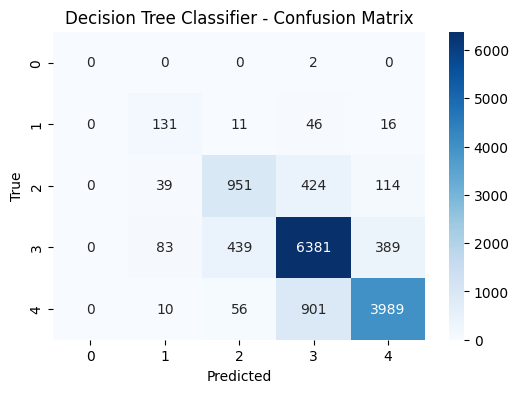

Train F1 Score (Micro) for Decision Tree Classifier is : 0.8194218802685223
Test F1 Score (Micro) for Decision Tree Classifier is : 0.8190530682305822
The Roc_Auc score for Decision Tree Classifier is : 0.8289898012301773


In [ ]:
# Predicting the model
y_predict_dt_test = model_dtree.predict(X_test)
y_predict_dt_train = model_dtree.predict(X_train)

# Classification report for test set
print(classification_report(y_test, y_predict_dt_test))

# Confusion matrix
cm = confusion_matrix(y_test, y_predict_dt_test)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Decision Tree Classifier - Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# F1 scores for training and testing datasets using micro average
train_score_1 = f1_score(y_train, y_predict_dt_train , average='micro')
score_1 = f1_score(y_test, y_predict_dt_test, average='micro')

# Print F1 scores
print('Train F1 Score (Micro) for Decision Tree Classifier is : {}'.format(train_score_1))
print('Test F1 Score (Micro) for Decision Tree Classifier is : {}'.format(score_1))



# Print roc auc scores for multi-class
roc_auc = roc_auc_score(y_test, model_dtree.predict_proba(X_test), multi_class='ovr')
print('The Roc_Auc score for Decision Tree Classifier is : {}'.format(roc_auc))


### **4. Logistic Regression Classifier**

In [ ]:
# Training the model
from sklearn.linear_model import LogisticRegression
model_lr=LogisticRegression()
model_lr.fit(X_train,y_train)

LogisticRegression()

              precision    recall  f1-score   support

           1       0.00      0.00      0.00         2
           2       0.00      0.00      0.00       204
           3       0.00      0.00      0.00      1528
           4       0.63      0.97      0.76      7292
           5       0.90      0.48      0.63      4956

    accuracy                           0.68     13982
   macro avg       0.31      0.29      0.28     13982
weighted avg       0.65      0.68      0.62     13982



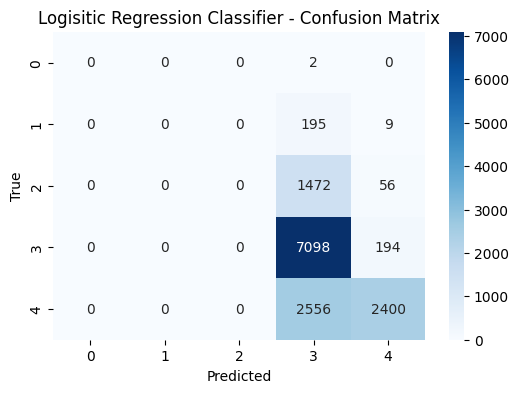

Train F1 Score (Micro) for Logisitic Regression Classifier is : 0.678723599914171
Test F1 Score (Micro) for Logisitic Regression Classifier is : 0.6793019596624231
The Roc_Auc score for Logisitic Regression Classifier is : 0.6708103473804293


In [ ]:
# Predicting the model
y_predict_lr_test = model_lr.predict(X_test)
y_predict_lr_train = model_lr.predict(X_train)

# Classification report for test set
print(classification_report(y_test, y_predict_lr_test))

# Confusion matrix
cm = confusion_matrix(y_test, y_predict_lr_test)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Logisitic Regression Classifier - Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# F1 scores for training and testing datasets using micro average
train_score_1 = f1_score(y_train, y_predict_lr_train , average='micro')
score_1 = f1_score(y_test, y_predict_lr_test, average='micro')

# Print F1 scores
print('Train F1 Score (Micro) for Logisitic Regression Classifier is : {}'.format(train_score_1))
print('Test F1 Score (Micro) for Logisitic Regression Classifier is : {}'.format(score_1))



# Print roc auc scores for multi-class
roc_auc = roc_auc_score(y_test, model_lr.predict_proba(X_test), multi_class='ovr')
print('The Roc_Auc score for Logisitic Regression Classifier is : {}'.format(roc_auc))


### **5. KNN Classifier**

In [ ]:
# Training the model
from sklearn.neighbors import KNeighborsClassifier
model_knn=KNeighborsClassifier(n_neighbors=5)
model_knn.fit(X_train,y_train)

KNeighborsClassifier()

              precision    recall  f1-score   support

           1       0.00      0.00      0.00         2
           2       0.50      0.65      0.57       204
           3       0.57      0.59      0.58      1528
           4       0.81      0.87      0.84      7292
           5       0.90      0.78      0.84      4956

    accuracy                           0.80     13982
   macro avg       0.56      0.58      0.56     13982
weighted avg       0.81      0.80      0.81     13982



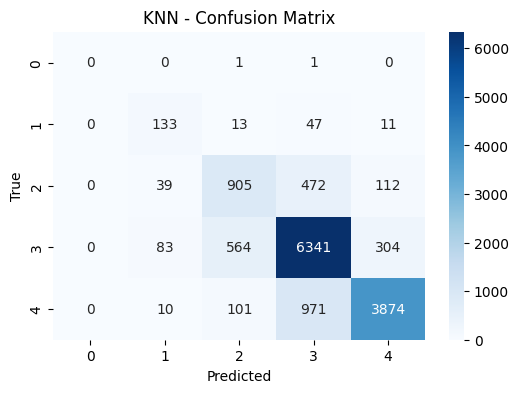

Train F1 Score (Micro) for KNN Classifier is : 0.8020415044600435
Test F1 Score (Micro) for KNN Classifier is : 0.8048204834787585
The Roc_Auc score for KNN is : 0.7940814825312921


In [ ]:
# Predicting the model
y_predict_knn_test = model_knn.predict(X_test)
y_predict_knn_train = model_knn.predict(X_train)

# Classification report for test set
print(classification_report(y_test, y_predict_knn_test))

# Confusion matrix
cm = confusion_matrix(y_test, y_predict_knn_test)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('KNN - Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# F1 scores for training and testing datasets using micro average
train_score_1 = f1_score(y_train, y_predict_knn_train , average='micro')
score_1 = f1_score(y_test, y_predict_knn_test, average='micro')

# Print F1 scores
print('Train F1 Score (Micro) for KNN Classifier is : {}'.format(train_score_1))
print('Test F1 Score (Micro) for KNN Classifier is : {}'.format(score_1))



# Print roc auc scores for multi-class
roc_auc = roc_auc_score(y_test, model_knn.predict_proba(X_test), multi_class='ovr')
print('The Roc_Auc score for KNN is : {}'.format(roc_auc))


### **6. Gradient Boosting Classifier**

In [ ]:
# Training the model
from sklearn.ensemble import GradientBoostingClassifier
model_gb=GradientBoostingClassifier(learning_rate= 0.1, max_depth= 5, n_estimators= 200,
        random_state=42)
model_gb.fit(X_train,y_train)

GradientBoostingClassifier(max_depth=5, n_estimators=200, random_state=42)

              precision    recall  f1-score   support

           1       0.00      0.00      0.00         2
           2       0.50      0.64      0.56       204
           3       0.66      0.61      0.63      1528
           4       0.82      0.88      0.85      7292
           5       0.89      0.80      0.84      4956

    accuracy                           0.82     13982
   macro avg       0.57      0.59      0.58     13982
weighted avg       0.82      0.82      0.82     13982



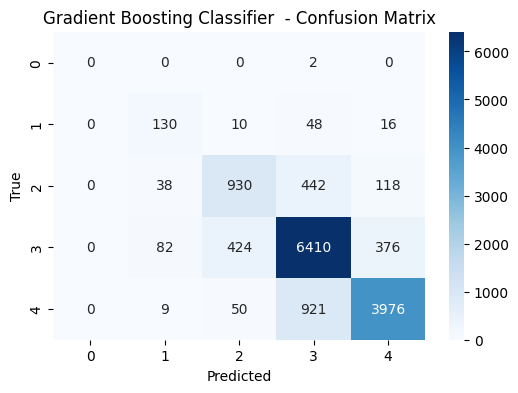

Train F1 Score (Micro) for Gradient Boosting Classifier is : 0.8181344450234497
Test F1 Score (Micro) for Gradient Boosting Classifier is : 0.8186239450722357
The Roc_Auc score for Gradient Boosting Classifier is : 0.8890594130214942


In [ ]:
# Predicting the model
y_predict_gb_test = model_gb.predict(X_test)
y_predict_gb_train = model_gb.predict(X_train)

# Classification report for test set
print(classification_report(y_test, y_predict_gb_test))

# Confusion matrix
cm = confusion_matrix(y_test, y_predict_gb_test)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Gradient Boosting Classifier  - Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# F1 scores for training and testing datasets using micro average
train_score_1 = f1_score(y_train, y_predict_gb_train , average='micro')
score_1 = f1_score(y_test, y_predict_gb_test, average='micro')

# Print F1 scores
print('Train F1 Score (Micro) for Gradient Boosting Classifier is : {}'.format(train_score_1))
print('Test F1 Score (Micro) for Gradient Boosting Classifier is : {}'.format(score_1))



# Print roc auc scores for multi-class
roc_auc = roc_auc_score(y_test, model_gb.predict_proba(X_test), multi_class='ovr')
print('The Roc_Auc score for Gradient Boosting Classifier is : {}'.format(roc_auc))


## **Comparison of Model ROC AUC and F1 Score**

In [ ]:
# ROC AUC scores
roc_auc_dtc = roc_auc_score(y_test, model_dtree.predict_proba(X_test), multi_class='ovr')
roc_auc_logreg = roc_auc_score(y_test, model_lr.predict_proba(X_test), multi_class='ovr')
roc_auc_knn = roc_auc_score(y_test, model_knn.predict_proba(X_test), multi_class='ovr')
roc_auc_gbc = roc_auc_score(y_test, model_gb.predict_proba(X_test), multi_class='ovr')
roc_auc_xgb = roc_auc_score(y_test, model_xgb.predict_proba(X_test), multi_class='ovr')
roc_auc_rfc = roc_auc_score(y_test, model_rf.predict_proba(X_test), multi_class='ovr')

# F1 scores
train_score_dtc = f1_score(y_train, y_predict_dt_train, average='micro')
score_dtc = f1_score(y_test, y_predict_dt_test, average='micro')

train_score_logreg = f1_score(y_train, y_predict_lr_train, average='micro')
score_logreg = f1_score(y_test, y_predict_lr_test, average='micro')

train_score_knn = f1_score(y_train, y_predict_knn_train, average='micro')
score_knn = f1_score(y_test, y_predict_knn_test, average='micro')

train_score_gbc = f1_score(y_train, y_predict_gb_train, average='micro')
score_gbc = f1_score(y_test, y_predict_gb_test, average='micro')

train_score_xgb = f1_score(y_train, y_predict_xgb_train, average='micro')
score_xgb = f1_score(y_test, y_predict_xgb_test, average='micro')

train_score_rfc = f1_score(y_train, y_predict_rf_train, average='micro')
score_rfc = f1_score(y_test, y_predict_rf_test, average='micro')

# Create a DataFrame with ROC AUC and F1 scores
metrics_df = pd.DataFrame({
    'Model': ['Decision Tree', 'Logistic Regression', 'KNN', 'Gradient Boosting', 'XGBoost', 'Random Forest'],
    'ROC AUC': [roc_auc_dtc, roc_auc_logreg, roc_auc_knn, roc_auc_gbc, roc_auc_xgb, roc_auc_rfc],
    'Train F1 Score': [train_score_dtc, train_score_logreg, train_score_knn, train_score_gbc, train_score_xgb, train_score_rfc],
    'Test F1 Score': [score_dtc, score_logreg, score_knn, score_gbc, score_xgb, score_rfc]
})


In [ ]:
# Display the DataFrame
metrics_df

,Model,ROC AUC,Train F1 Score,Test F1 Score
0,Decision Tree,0.828990,0.819422,0.819053
1,Logistic Regression,0.670810,0.678724,0.679302
2,KNN,0.794081,0.802042,0.804820
3,Gradient Boosting,0.889059,0.818134,0.818624
4,XGBoost,0.857118,0.062778,0.061079
5,Random Forest,0.832984,0.819422,0.819411


# **Conclusion:**
**The Gradient Boosting Classifier is the best model for predicting high priority tickets where high scores for both F1 Score 81.18% and ROC AUC 88.90% where it is performing really well.**

- Its superior ROC AUC (0.889) ensures that it is highly effective at distinguishing between classes, which is crucial for prioritization tasks.

- Its Train F1 Score (0.818) and Test F1 Score (0.819) are consistent, demonstrating that the model generalizes well to unseen data without overfitting.

### **Prediction for unseen data**

In [ ]:


# Unseen data (new instances for prediction)
unseen_data = pd.DataFrame({
    'CI_Cat': [40000, 20000, 15000, 8500, 45000],
    'CI_Subcat': [6, 6, 6, 6, 6],
    'WBS': ['WBS000095', 'WBS000272', 'WBS000074', 'WBS000319', 'WBS000265'],
    'Category': [1, 1, 2, 2, 2]
})



In [ ]:
# Apply the same preprocessing pipeline as used for training data
# For instance, if WBS was label encoded:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
unseen_data['WBS'] = encoder.fit_transform(unseen_data['WBS'])  # Use the same encoder if saved during training


In [ ]:
# Use the trained model to predict
predictions = model_gb.predict(unseen_data)


In [ ]:

# Add predictions to the dataframe
unseen_data['Predicted_Category'] = predictions

print(unseen_data)

   CI_Cat  CI_Subcat  WBS  Category  Predicted_Category
0   40000          6    1         1                   5
1   20000          6    3         1                   2
2   15000          6    0         2                   3
3    8500          6    4         2                   2
4   45000          6    2         2                   4


## **2. Forecasting the Incident Volume**

In [ ]:
# Imporing the necessary columns
df = data.loc[:,['Incident_ID','Open_Time']]

In [ ]:
df.sample()

,Incident_ID,Open_Time
27627,IM0027899,14-01-2014 10:38


In [ ]:
import datetime as dt

### **The 'Open_Time' column contained dates in different formats, so a function is written to parse the dates correctly.**

In [ ]:
# Define a function to parse the date formats
def parse_date(date_str):
    try:
        # Try to parse the date using one format
        return pd.to_datetime(date_str, format='%d/%m/%Y %H:%M')
    except ValueError:
        # If the first format fails, try the second format
        return pd.to_datetime(date_str, format='%d-%m-%Y %H:%M')

# Apply the function to the 'Open_Time' column
df['Open_Time'] = df['Open_Time'].apply(parse_date)

# Convert the 'Open_Time' column to the desired string format
df['Open_Time'] = df['Open_Time'].dt.strftime('%Y-%m-%d')

# Print the modified DataFrame
df

,Incident_ID,Open_Time
0,IM0000004,2012-02-05
1,IM0000005,2012-03-12
2,IM0000006,2012-03-29
3,IM0000011,2012-07-17
4,IM0000012,2012-08-10
...,...,...
46601,IM0047053,2014-03-31
46602,IM0047054,2014-03-31
46603,IM0047055,2014-03-31
46604,IM0047056,2014-03-31


#### **Exploratory Data Analysis**

In [ ]:
# Adding a new column which will have the number of tickets per day
df['No_Incidents'] = df.groupby('Open_Time')['Incident_ID'].transform('count')

In [ ]:
df.drop(['Incident_ID'],axis=1,inplace=True)

##### **After converting the dates to a consistent format, created a new DataFrame with the 'Incident_ID' column removed.**

In [ ]:
df.duplicated().sum()

46274

In [ ]:
df.drop_duplicates(inplace=True)

**Calculated the number of incidents per day and found that there were duplicate values in the dataset. After removing duplicates, we set the 'Open_Time' as the index and checked the date range.**

In [ ]:
df.sample(20)

,Open_Time,No_Incidents
32046,2014-01-30,455
151,2013-07-12,4
50,2013-04-10,2
23,2013-01-23,1
11785,2013-11-08,275
3239,2013-10-08,407
0,2012-02-05,1
233,2013-08-14,2
33,2013-02-26,1
194,2013-07-30,5


In [ ]:
# Setting Date as the Index
df = df.set_index('Open_Time')
df.index = pd.to_datetime(df.index)
df.index

DatetimeIndex(['2012-02-05', '2012-03-12', '2012-03-29', '2012-07-17',
               '2012-08-10', '2012-08-15', '2012-08-22', '2012-08-29',
               '2012-09-03', '2012-09-21',
               ...
               '2014-03-22', '2014-03-24', '2014-03-23', '2014-03-25',
               '2014-03-26', '2014-03-27', '2014-03-28', '2014-03-29',
               '2014-03-30', '2014-03-31'],
              dtype='datetime64[ns]', name='Open_Time', length=331, freq=None)

In [ ]:
df.sample(10)

,No_Incidents
Open_Time,
2012-10-15,1
2013-05-24,2
2013-02-18,1
2013-07-22,2
2014-03-10,352
2013-12-18,331
2013-09-23,49
2014-02-07,355
2014-02-16,4


In [ ]:
# Checking range of dates for our values
print(df.index.min(),'to',df.index.max())

2012-02-05 00:00:00 to 2014-03-31 00:00:00


In [ ]:
# Making a new Series with frequency as Day
data1 = df['No_Incidents']
data1 = data1.asfreq('D')
data1.index

DatetimeIndex(['2012-02-05', '2012-02-06', '2012-02-07', '2012-02-08',
               '2012-02-09', '2012-02-10', '2012-02-11', '2012-02-12',
               '2012-02-13', '2012-02-14',
               ...
               '2014-03-22', '2014-03-23', '2014-03-24', '2014-03-25',
               '2014-03-26', '2014-03-27', '2014-03-28', '2014-03-29',
               '2014-03-30', '2014-03-31'],
              dtype='datetime64[ns]', name='Open_Time', length=786, freq='D')

In [ ]:
data1.sample(10)

,No_Incidents
Open_Time,
2013-06-18,1.0
2013-11-21,385.0
2012-09-30,NaN
2012-05-19,NaN
2013-11-11,415.0
2012-02-20,NaN
2014-03-17,316.0
2013-11-04,454.0
2014-01-24,304.0


**Data Analysis and Visualization**

To better understand the incident volume, created a time series plot of the number of tickets per day. From the plot, we noticed that there was a significant increase in incidents after October 2013.

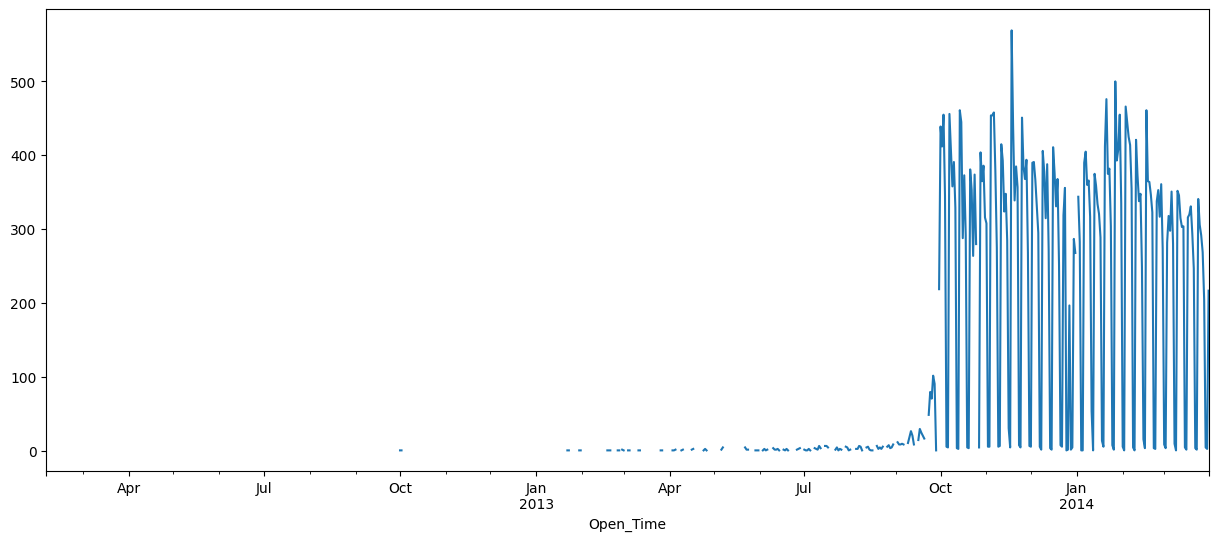

In [ ]:
# Plotting number of tickets per day
data1.plot(figsize=(15,6))# Since not many tickets before October 2013, we consider only the latter values
incfrom2013 = df[df.index > dt.datetime(2013,10,1)]
plt.show()

In [ ]:
# Since not many tickets before October 2013, we consider only the latter values
incfrom2013 = df[df.index > dt.datetime(2013,10,1)]

In [ ]:
incfrom2013.sample(10)

,No_Incidents
Open_Time,
2014-02-09,1
2014-01-24,304
2014-03-25,306
2013-12-04,367
2014-01-22,375
2013-10-21,381
2013-12-06,295
2014-03-02,4
2014-02-20,347


In [ ]:
# new Series from oct 2013
data2 = incfrom2013['No_Incidents']
data2 = data2.asfreq('D')
data2.index

DatetimeIndex(['2013-10-02', '2013-10-03', '2013-10-04', '2013-10-05',
               '2013-10-06', '2013-10-07', '2013-10-08', '2013-10-09',
               '2013-10-10', '2013-10-11',
               ...
               '2014-03-22', '2014-03-23', '2014-03-24', '2014-03-25',
               '2014-03-26', '2014-03-27', '2014-03-28', '2014-03-29',
               '2014-03-30', '2014-03-31'],
              dtype='datetime64[ns]', name='Open_Time', length=181, freq='D')

In [ ]:
data2.sample(10)

,No_Incidents
Open_Time,
2013-12-03,391.0
2013-10-16,288.0
2013-12-24,356.0
2013-12-04,367.0
2014-02-19,364.0
2014-03-08,10.0
2014-02-22,4.0
2013-10-17,373.0
2013-10-19,5.0


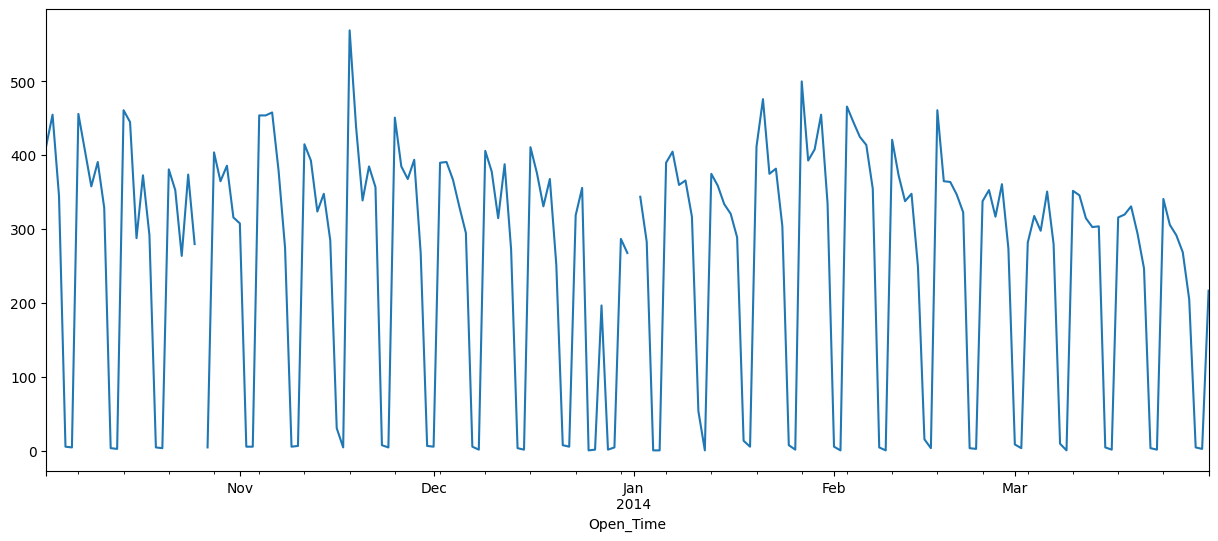

In [ ]:
# Plotting number of tickets per day after October 2013
data2.plot(figsize=(15,6))
plt.show()

### **3. Auto tag the tickets with right priorities**

In [ ]:
import itertools
import statsmodels.api as sm

In [ ]:
# Making a list of values for p,d & q
p = d = q = range(0,2)
pdq = list(itertools.product(p,d,q))

#### **Choosing ARIMA Model**

In [ ]:
# Checking the AIC values per pairs
for param in pdq:
    mod = sm.tsa.statespace.SARIMAX(data2,order=param,enforce_stationarity=False,enforce_invertibility=False)
    results = mod.fit()
    print('ARIMA{} - AIC:{}'.format(param, results.aic))

ARIMA(0, 0, 0) - AIC:2539.6121269479636
ARIMA(0, 0, 1) - AIC:2373.781784431641
ARIMA(0, 1, 0) - AIC:2371.131939628779
ARIMA(0, 1, 1) - AIC:2313.135066817212
ARIMA(1, 0, 0) - AIC:2365.2932154567698
ARIMA(1, 0, 1) - AIC:2337.318207738464
ARIMA(1, 1, 0) - AIC:2373.130961735599
ARIMA(1, 1, 1) - AIC:2294.431808932789


In [ ]:
# Choosing the model with minimum AIC and the ARIMA Model for Time Series Forecasting
mod = sm.tsa.statespace.SARIMAX(data2,order=(1,1,1))
results = mod.fit()
print(results.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.3386      0.090      3.772      0.000       0.163       0.515
ma.L1         -0.9990      0.455     -2.195      0.028      -1.891      -0.107
sigma2      2.519e+04   1.04e+04      2.419      0.016    4784.813    4.56e+04


In [ ]:
# Predicting the future values and the confidence interval
pred = results.get_prediction(start=pd.to_datetime('2014-3-3'),end=pd.to_datetime('2014-10-30'),dynamic=False)
pred_ci = pred.conf_int()
pred.predicted_mean.round()

,predicted_mean
2014-03-03,172.0
2014-03-04,266.0
2014-03-05,279.0
2014-03-06,272.0
2014-03-07,291.0
...,...
2014-10-26,252.0
2014-10-27,252.0
2014-10-28,252.0
2014-10-29,252.0


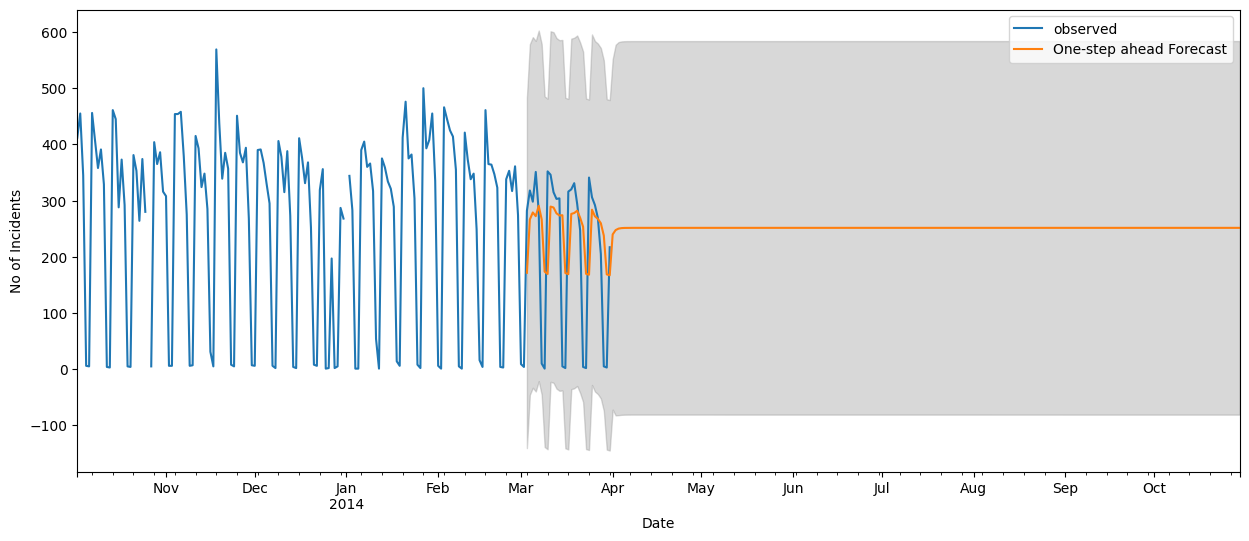

In [ ]:
ax = data2['2013':].plot(label='observed')
pred.predicted_mean.plot(ax=ax,label='One-step ahead Forecast',figsize=(15, 6))
ax.fill_between(pred_ci.index,pred_ci.iloc[:,0],pred_ci.iloc[:,1],color='grey',alpha=0.3)
ax.set_xlabel('Date')
ax.set_ylabel('No of Incidents')
plt.legend()
plt.show()

**The predicted incident volumes were plotted alongside the observed data for visualization. This allowed you to assess the model's performance in forecasting incident volumes**

## **4. Predicting Request For Change (RFC)**

In [ ]:
data['No_of_Related_Changes'].value_counts()

,count
No_of_Related_Changes,
2.0,46069
1.0,536


In [ ]:
# Selecting the predictors
X1 = data.loc[:,['CI_Subcat','WBS','Priority','Category','No_of_Related_Interactions','No_of_Related_Incidents']]
y1 = data.No_of_Related_Changes

In [ ]:
for column in X1.columns:
    print(f"Unique values in '{column}':")
    print(X1[column].unique())

Unique values in 'CI_Subcat':
[ 2  3  1  4  7  5 10  9  6  8 17 13 12 14 11 15 16]
Unique values in 'WBS':
['WBS000162' 'WBS000088' 'WBS000092' 'WBS000055' 'WBS000090' 'WBS000073'
 'WBS000066' 'WBS000071' 'WBS000263' 'WBS000072' 'WBS000054' 'WBS000271'
 'WBS000170' 'WBS000014' 'WBS000098' 'WBS000043' 'WBS000086' 'WBS000027'
 'WBS000300' 'WBS000223' 'WBS000311' 'WBS000142' 'WBS000109' 'WBS000153'
 'WBS000102' 'WBS000152' 'WBS000129' 'WBS000251' 'WBS000115' 'WBS000168'
 'WBS000136' 'WBS000314' 'WBS000187' 'WBS000135' 'WBS000217' 'WBS000091'
 'WBS000296' 'WBS000161' 'WBS000312' 'WBS000012' 'WBS000234' 'WBS000094'
 'WBS000318' 'WBS000285' 'WBS000093' 'WBS000016' 'WBS000118' 'WBS000298'
 'WBS000096' 'WBS000025' 'WBS000272' 'WBS000284' 'WBS000128' 'WBS000067'
 'WBS000110' 'WBS000292' 'WBS000165' 'WBS000015' 'WBS000111' 'WBS000199'
 'WBS000095' 'WBS000089' 'WBS000017' 'WBS000069' 'WBS000241' 'WBS000023'
 'WBS000140' 'WBS000070' 'WBS000167' 'WBS000138' 'WBS000125' 'WBS000249'
 'WBS000039' 'WBS

In [ ]:
data.columns

Index(['CI_Name', 'CI_Cat', 'CI_Subcat', 'WBS', 'Incident_ID', 'Status',
       'Impact', 'Urgency', 'Priority', 'number_cnt', 'Category', 'KB_number',
       'Alert_Status', 'No_of_Reassignments', 'Open_Time', 'Reopen_Time',
       'Resolved_Time', 'Close_Time', 'Handle_Time_hrs', 'Closure_Code',
       'No_of_Related_Interactions', 'Related_Interaction',
       'No_of_Related_Incidents', 'No_of_Related_Changes', 'Related_Change'],
      dtype='object')

In [ ]:
data['No_of_Related_Changes'].unique()

array([2., 1.])

In [ ]:
data['No_of_Related_Changes']=data['No_of_Related_Changes'].astype(int)

In [ ]:
enc= LabelEncoder()
for i in (0,1,3,4):
    X1.iloc[:,i] = enc.fit_transform(X1.iloc[:,i])

In [ ]:
# Splitting into train and test for calculating the accuracy
X1_train, X1_test, y1_train, y1_test = train_test_split(X1,y1,test_size=0.3,random_state=10)

In [ ]:
# Standardization technique is used
sc = StandardScaler()
X1_train = sc.fit_transform(X1_train)
X1_test = sc.transform(X1_test)

In [ ]:
X1_train.shape

(32623, 6)

In [ ]:
X1_test.shape

(13982, 6)

# **Model Iterations**

### **1. Random Forest Classifier**

In [ ]:
#Training the model
model_rf1 = RandomForestClassifier(max_depth=27)
model_rf1.fit(X1_train,y1_train)

RandomForestClassifier(max_depth=27)

In [ ]:
# Predicting the model
y_predict_rf_test1 = model_rf1.predict(X1_test)
y_predict_rf_train1 = model_rf1.predict(X1_train)


              precision    recall  f1-score   support

         1.0       0.27      0.02      0.04       144
         2.0       0.99      1.00      0.99     13838

    accuracy                           0.99     13982
   macro avg       0.63      0.51      0.52     13982
weighted avg       0.98      0.99      0.98     13982



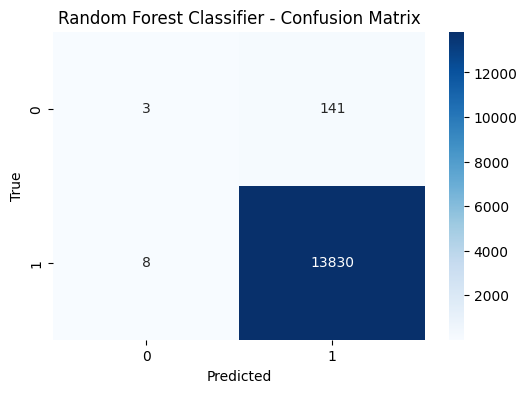

Train F1 Score (Micro) for Random Forest Classifier Classifier is : 0.9897311712595408
Test F1 Score (Micro) for Random Forest Classifier is : 0.9893434415677299
The Roc_Auc score for Random Forest Classifier is : 0.8890594130214942


In [ ]:
# Classification report for test set
print(classification_report(y1_test, y_predict_rf_test1))

# Confusion matrix
cm = confusion_matrix(y1_test, y_predict_rf_test1)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Random Forest Classifier - Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# F1 scores for training and testing datasets using micro average
train_score_1 = f1_score(y1_train, y_predict_rf_train1 , average='micro')
score_1 = f1_score(y1_test, y_predict_rf_test1, average='micro')

# Print F1 scores
print('Train F1 Score (Micro) for Random Forest Classifier Classifier is : {}'.format(train_score_1))
print('Test F1 Score (Micro) for Random Forest Classifier is : {}'.format(score_1))



# Print roc auc scores for multi-class
roc_auc_rfc1 = roc_auc_score(y1_test, model_rf1.predict_proba(X1_test)[:, 1])

print('The Roc_Auc score for Random Forest Classifier is : {}'.format(roc_auc))


### **2. XGBoost Classifier**

In [ ]:
# Map target variable to integers
y1_train_mapped = y1_train.map({1.0: 0, 2.0: 1})
y1_test_mapped = y1_test.map({1.0: 0, 2.0: 1})

# Training the XGBoost model
model_xgb1 = XGBClassifier(max_depth=27, use_label_encoder=False, eval_metric='mlogloss')
model_xgb1.fit(X1_train, y1_train_mapped)

# Predicting the model
y_predict_xgb_test1 = model_xgb1.predict(X1_test)
y_predict_xgb_train1 = model_xgb1.predict(X1_train)



              precision    recall  f1-score   support

           0       0.21      0.02      0.04       144
           1       0.99      1.00      0.99     13838

    accuracy                           0.99     13982
   macro avg       0.60      0.51      0.52     13982
weighted avg       0.98      0.99      0.98     13982



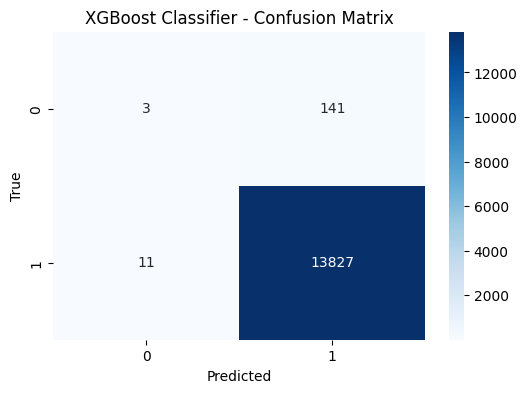

Train F1 Score (Micro) for XGBoost Classifier is : 0.9894859454985746
Test F1 Score (Micro) for XGBoost Classifier is : 0.9891288799885567
The ROC AUC Score for XGBoost Classifier is : 0.7755132304764658


In [ ]:
# Classification report for test set
print(classification_report(y1_test_mapped, y_predict_xgb_test1))

# Confusion matrix
cm_xgb = confusion_matrix(y1_test_mapped, y_predict_xgb_test1)
plt.figure(figsize=(6, 4))
sns.heatmap(cm_xgb, annot=True, fmt='d', cmap='Blues')
plt.title('XGBoost Classifier - Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# F1 scores for training and testing datasets using micro average
train_score_2 = f1_score(y1_train_mapped, y_predict_xgb_train1, average='micro')
score_2 = f1_score(y1_test_mapped, y_predict_xgb_test1, average='micro')

# Print F1 scores
print('Train F1 Score (Micro) for XGBoost Classifier is : {}'.format(train_score_2))
print('Test F1 Score (Micro) for XGBoost Classifier is : {}'.format(score_2))

# Print ROC AUC scores for multi-class (use OneVsRest strategy for multi-class)
roc_auc_xgb1 = roc_auc_score(y1_test_mapped, model_xgb1.predict_proba(X1_test)[:, 1])

print('The ROC AUC Score for XGBoost Classifier is : {}'.format(roc_auc_xgb1))


### **3. Logistic Regression Classifier**

In [ ]:
# Training the model
from sklearn.linear_model import LogisticRegression
model_lr1=LogisticRegression()
model_lr1.fit(X1_train,y1_train)

LogisticRegression()

              precision    recall  f1-score   support

         1.0       0.00      0.00      0.00       144
         2.0       0.99      1.00      0.99     13838

    accuracy                           0.99     13982
   macro avg       0.49      0.50      0.50     13982
weighted avg       0.98      0.99      0.98     13982



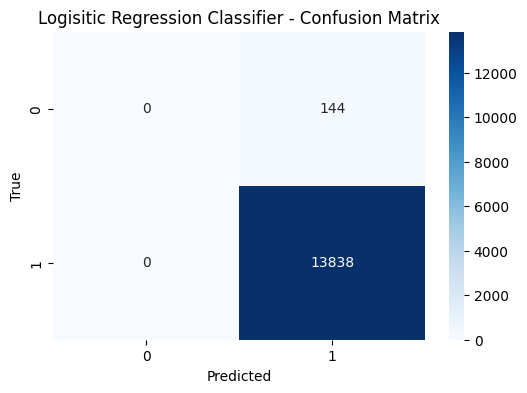

Train F1 Score (Micro) for Logisitic Regression Classifier is : 0.9879839377126567
Test F1 Score (Micro) for Logisitic Regression Classifier is : 0.9897010441996853
The Roc_Auc score for Logisitic Regression Classifier is : 0.5894567696038284


In [ ]:
# Predicting the model
y_predict_lr_test1 = model_lr1.predict(X1_test)
y_predict_lr_train1 = model_lr1.predict(X1_train)

# Classification report for test set
print(classification_report(y1_test, y_predict_lr_test1))

# Confusion matrix
cm = confusion_matrix(y1_test, y_predict_lr_test1)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Logisitic Regression Classifier - Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# F1 scores for training and testing datasets using micro average
train_score_3 = f1_score(y1_train, y_predict_lr_train1 , average='micro')
score_3 = f1_score(y1_test, y_predict_lr_test1, average='micro')

# Print F1 scores
print('Train F1 Score (Micro) for Logisitic Regression Classifier is : {}'.format(train_score_3))
print('Test F1 Score (Micro) for Logisitic Regression Classifier is : {}'.format(score_3))



# Print roc auc scores for multi-class
roc_auc_lr1 = roc_auc_score(y1_test, model_lr1.predict_proba(X1_test)[:, 1])
print('The Roc_Auc score for Logisitic Regression Classifier is : {}'.format(roc_auc_lr1))


### **4. KNN Classifier**

              precision    recall  f1-score   support

         1.0       0.25      0.01      0.01       144
         2.0       0.99      1.00      0.99     13838

    accuracy                           0.99     13982
   macro avg       0.62      0.50      0.50     13982
weighted avg       0.98      0.99      0.98     13982



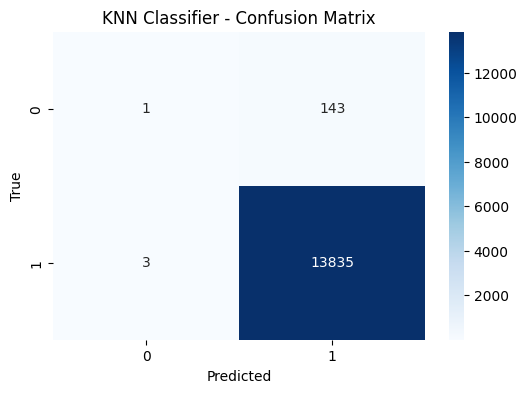

Train F1 Score (Micro) for KNN Classifier is : 0.988075897373019
Test F1 Score (Micro) for KNN Classifier is : 0.9895580031469031
The ROC AUC score for KNN Classifier is : 0.5540395007306772


In [ ]:

# Training the KNN model
model_knn = KNeighborsClassifier(n_neighbors=5)  # You can adjust n_neighbors for optimal performance
model_knn.fit(X1_train, y1_train)

# Predicting the model
y_predict_knn_test1 = model_knn.predict(X1_test)
y_predict_knn_train1 = model_knn.predict(X1_train)

# Classification report for test set
print(classification_report(y1_test, y_predict_knn_test1))

# Confusion matrix
cm = confusion_matrix(y1_test, y_predict_knn_test1)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('KNN Classifier - Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# F1 scores for training and testing datasets using micro average
train_score_4 = f1_score(y1_train, y_predict_knn_train1, average='micro')
score_4 = f1_score(y1_test, y_predict_knn_test1, average='micro')

# Print F1 scores
print('Train F1 Score (Micro) for KNN Classifier is : {}'.format(train_score_4))
print('Test F1 Score (Micro) for KNN Classifier is : {}'.format(score_4))

# Print ROC AUC scores for multi-class
roc_auc_knn1 = roc_auc_score(y1_test, model_knn.predict_proba(X1_test)[:, 1])
print('The ROC AUC score for KNN Classifier is : {}'.format(roc_auc_knn1))

### **5. Gradient Boosting Classifier**

In [ ]:


# Define the model with specified parameters
model_gb1 = GradientBoostingClassifier(learning_rate=0.1, max_depth=5, n_estimators=200, random_state=42)

# Train the model on the training data
model_gb1.fit(X1_train, y1_train)

# Predicting with the trained model
y_predict_gb_test1 = model_gb1.predict(X1_test)  # Use model_gb1 here
y_predict_gb_train1 = model_gb1.predict(X1_train)  # Use model_gb1 here



              precision    recall  f1-score   support

         1.0       0.11      0.01      0.02       144
         2.0       0.99      1.00      0.99     13838

    accuracy                           0.99     13982
   macro avg       0.55      0.51      0.51     13982
weighted avg       0.98      0.99      0.98     13982



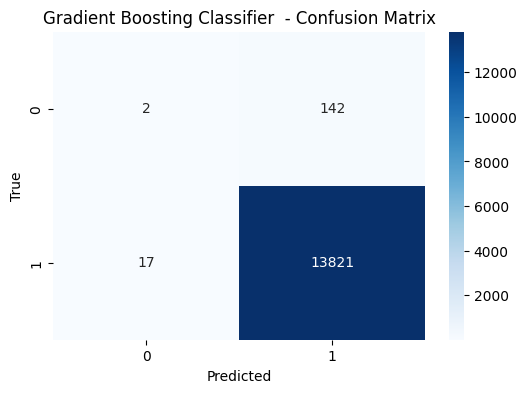

Train F1 Score (Micro) for Gradient Boosting Classifier is : 0.9896392115991784
Test F1 Score (Micro) for Gradient Boosting Classifier is : 0.9886282363038192
The Roc_Auc score for Gradient Boosting Classifier is : 0.7935309975751152


In [ ]:
# Classification report for test set
print(classification_report(y1_test, y_predict_gb_test1))

# Confusion matrix
cm = confusion_matrix(y1_test, y_predict_gb_test1)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Gradient Boosting Classifier  - Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# F1 scores for training and testing datasets using micro average
train_score_5 = f1_score(y1_train, y_predict_gb_train1, average='micro')
score_5 = f1_score(y1_test, y_predict_gb_test1, average='micro')

# Print F1 scores
print('Train F1 Score (Micro) for Gradient Boosting Classifier is : {}'.format(train_score_5))
print('Test F1 Score (Micro) for Gradient Boosting Classifier is : {}'.format(score_5))

# Print ROC AUC scores for multi-class
roc_auc_gb1 = roc_auc_score(y1_test, model_gb1.predict_proba(X1_test)[:, 1])
print('The Roc_Auc score for Gradient Boosting Classifier is : {}'.format(roc_auc_gb1))


### **6. Decision Tree Classifier**

              precision    recall  f1-score   support

         1.0       0.12      0.03      0.05       144
         2.0       0.99      1.00      0.99     13838

    accuracy                           0.99     13982
   macro avg       0.56      0.51      0.52     13982
weighted avg       0.98      0.99      0.98     13982



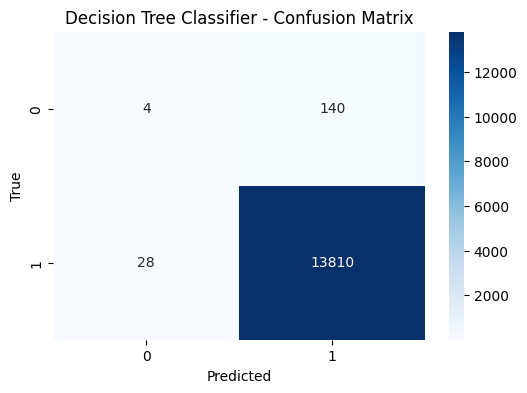

Train F1 Score (Micro) for Decision Tree Classifier is : 0.9897618244796615
Test F1 Score (Micro) for Decision Tree Classifier is : 0.9879845515662995
The Roc_Auc score for Decision Tree Classifier is : 0.7257225474137239


In [ ]:
from sklearn.tree import DecisionTreeClassifier

# Define the model
model_dtree1 = DecisionTreeClassifier()

# Train the model on the training data
model_dtree1.fit(X1_train, y1_train)

# Predicting with the trained model
y_predict_dt_test1 = model_dtree1.predict(X1_test)  # Use model_dtree1 here
y_predict_dt_train1 = model_dtree1.predict(X1_train)  # Use model_dtree1 here

# Classification report for test set
print(classification_report(y1_test, y_predict_dt_test1))

# Confusion matrix
cm = confusion_matrix(y1_test, y_predict_dt_test1)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Decision Tree Classifier - Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# F1 scores for training and testing datasets using micro average
train_score_6 = f1_score(y1_train, y_predict_dt_train1, average='micro')
score_6 = f1_score(y1_test, y_predict_dt_test1, average='micro')

# Print F1 scores
print('Train F1 Score (Micro) for Decision Tree Classifier is : {}'.format(train_score_6))
print('Test F1 Score (Micro) for Decision Tree Classifier is : {}'.format(score_6))

# Print ROC AUC scores for multi-class
roc_auc_dtc1 = roc_auc_score(y1_test, model_dtree1.predict_proba(X1_test)[:, 1])
print('The Roc_Auc score for Decision Tree Classifier is : {}'.format(roc_auc_dtc1))


## **Comparison of Model ROC AUC Curve**

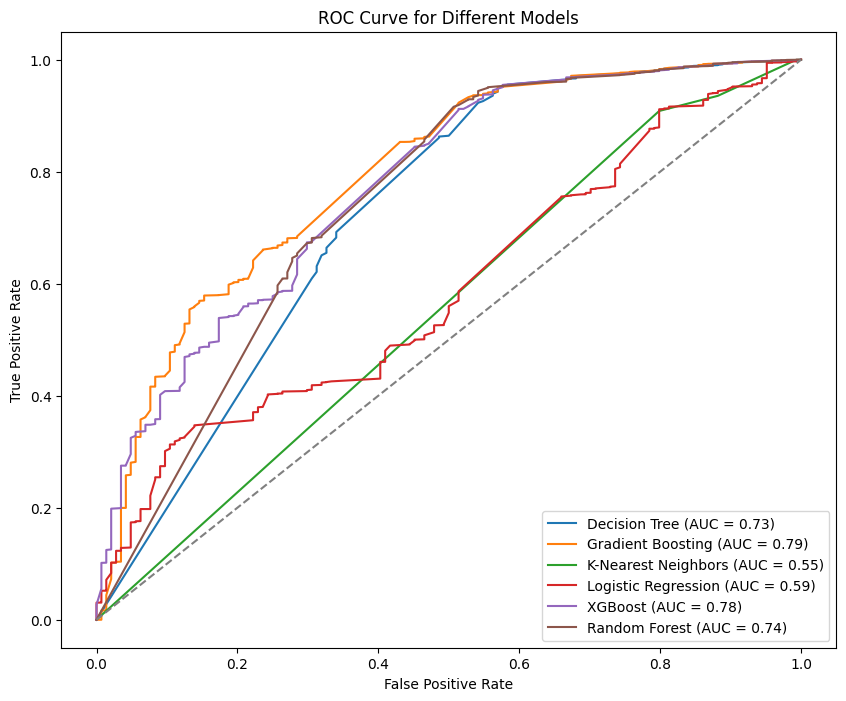

In [ ]:
# Remap {-1, 0} to {0, 1}
y1_test_mapped_binary = (y1_test_mapped_binary + 1)  # Convert {-1, 0} to {0, 1}

# Recalculate the ROC curve with the mapped target values
fpr_dtc1, tpr_dtc1, _ = roc_curve(y1_test_binary, model_dtree1.predict_proba(X1_test)[:, 1])
fpr_gb1, tpr_gb1, _ = roc_curve(y1_test_binary, model_gb1.predict_proba(X1_test)[:, 1])
fpr_knn1, tpr_knn1, _ = roc_curve(y1_test_binary, model_knn.predict_proba(X1_test)[:, 1])
fpr_lr1, tpr_lr1, _ = roc_curve(y1_test_binary, model_lr1.predict_proba(X1_test)[:, 1])
fpr_xgb1, tpr_xgb1, _ = roc_curve(y1_test_mapped_binary, model_xgb1.predict_proba(X1_test)[:, 1])
fpr_rfc1, tpr_rfc1, _ = roc_curve(y1_test_binary, model_rf1.predict_proba(X1_test)[:, 1])

# Plot the ROC curve as before
plt.figure(figsize=(10, 8))
plt.plot(fpr_dtc1, tpr_dtc1, label=f'Decision Tree (AUC = {roc_auc_dtc1:.2f})')
plt.plot(fpr_gb1, tpr_gb1, label=f'Gradient Boosting (AUC = {roc_auc_gb1:.2f})')
plt.plot(fpr_knn1, tpr_knn1, label=f'K-Nearest Neighbors (AUC = {roc_auc_knn1:.2f})')
plt.plot(fpr_lr1, tpr_lr1, label=f'Logistic Regression (AUC = {roc_auc_lr1:.2f})')
plt.plot(fpr_xgb1, tpr_xgb1, label=f'XGBoost (AUC = {roc_auc_xgb1:.2f})')
plt.plot(fpr_rfc1, tpr_rfc1, label=f'Random Forest (AUC = {roc_auc_rfc1:.2f})')

# Plot the diagonal line (random model)
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')

# Set labels and title
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Different Models')

# Show legend
plt.legend(loc='lower right')

# Display the plot
plt.show()


In [ ]:
# ROC AUC scores
roc_auc_dtc1 = roc_auc_score(y1_test, model_dtree1.predict_proba(X1_test)[:, 1])
roc_auc_gb1 = roc_auc_score(y1_test, model_gb1.predict_proba(X1_test)[:, 1])
roc_auc_knn1 = roc_auc_score(y1_test, model_knn.predict_proba(X1_test)[:, 1])
roc_auc_lr1 = roc_auc_score(y1_test, model_lr1.predict_proba(X1_test)[:, 1])
roc_auc_xgb1 = roc_auc_score(y1_test_mapped, model_xgb1.predict_proba(X1_test)[:, 1])
roc_auc_rfc1 = roc_auc_score(y1_test, model_rf1.predict_proba(X1_test)[:, 1])

# F1 scores
train_score_6 = f1_score(y1_train, y_predict_dt_train1, average='micro')
score_6 = f1_score(y1_test, y_predict_dt_test1, average='micro')

train_score_5 = f1_score(y1_train, y_predict_gb_train1, average='micro')
score_5 = f1_score(y1_test, y_predict_gb_test1, average='micro')

train_score_4 = f1_score(y1_train, y_predict_knn_train1, average='micro')
score_4 = f1_score(y1_test, y_predict_knn_test1, average='micro')

train_score_3 = f1_score(y1_train, y_predict_lr_train1 , average='micro')
score_3 = f1_score(y1_test, y_predict_lr_test1, average='micro')

train_score_2 = f1_score(y1_train_mapped, y_predict_xgb_train1, average='micro')
score_2 = f1_score(y1_test_mapped, y_predict_xgb_test1, average='micro')

train_score_1 = f1_score(y1_train, y_predict_rf_train1 , average='micro')
score_1 = f1_score(y1_test, y_predict_rf_test1, average='micro')


# Create a DataFrame with ROC AUC and F1 scores
metrics_df1 = pd.DataFrame({
    'Model': ['Decision Tree', 'Gradient Boosting', 'KNN', 'Logistic Regression','XGBoost', 'Random Forest'],
    'ROC AUC': [roc_auc_dtc1, roc_auc_gb1, roc_auc_knn1, roc_auc_lr1, roc_auc_xgb1, roc_auc_rfc1],
    'Train F1 Score': [train_score_6, train_score_5, train_score_4, train_score_3, train_score_2, train_score_1],
    'Test F1 Score': [score_6, score_5, score_4, score_3, score_2, score_1]
})


In [ ]:
metrics_df1

,Model,ROC AUC,Train F1 Score,Test F1 Score
0,Decision Tree,0.725723,0.989762,0.987985
1,Gradient Boosting,0.793531,0.989639,0.988628
2,KNN,0.554040,0.988076,0.989558
3,Logistic Regression,0.589457,0.987984,0.989701
4,XGBoost,0.775513,0.989486,0.989129
5,Random Forest,0.744897,0.989762,0.989057


# **Conclusion:**
**Gradient Boosting stands out as the best overall model, with the highest ROC AUC (79.35%) and consistent F1 scores(98.96%), making it the most suitable candidate for predicting No_of_Related_Changes.**

## **Predicting unseen Data**

In [ ]:
from sklearn.preprocessing import LabelEncoder
import pickle

# Initialize and fit encoders for each categorical column
encoders = {}
for col in ['CI_Subcat', 'WBS', 'Priority', 'Category']:
    enc = LabelEncoder()
    X1[col] = enc.fit_transform(X1[col])
    encoders[col] = enc  # Save the encoder for later use

# Save encoders
with open('label_encoders.pkl', 'wb') as f:
    pickle.dump(encoders, f)

In [ ]:
# Load saved encoders
with open('label_encoders.pkl', 'rb') as f:
    encoders = pickle.load(f)

# Encode unseen data
for col in ['CI_Subcat', 'WBS', 'Priority', 'Category']:
    enc = encoders[col]
    unseen_data[col] = unseen_data[col].apply(lambda x: enc.transform([x])[0] if x in enc.classes_ else -1)

# Handle missing or unknown categories
if -1 in unseen_data.values:
    print("Warning: Unseen categories were found and encoded as -1.")

In [ ]:
# Standardize unseen data
unseen_data_scaled = sc.transform(unseen_data)

In [ ]:
# Predict classes
unseen_predictions = model_gb1.predict(unseen_data_scaled)

# Predict probabilities
unseen_probabilities = model_gb1.predict_proba(unseen_data_scaled)

# Display results
for i, pred in enumerate(unseen_predictions):
    print(f"Unseen Data {i+1}: Predicted RFC Changes: {pred}, Probabilities: {unseen_probabilities[i]}")

Unseen Data 1: Predicted RFC Changes: 1.0, Probabilities: [0.65578262 0.34421738]
Unseen Data 2: Predicted RFC Changes: 1.0, Probabilities: [0.69164672 0.30835328]


## **Final Conclusion:**


- Predictive Insights:
Predicting high-priority tickets allows the organization to take preventive measures, improving incident response and reducing downtime.

- Resource Optimization:
Forecasting incident volumes quarterly and annually helps in better resource and capacity planning, ensuring readiness for future demands.

- Automation Benefits:
Auto-tagging tickets with correct priorities and departments minimizes delays, streamlines ticket handling, and enhances overall process efficiency.

- Risk Mitigation:
Predicting RFC failures reduces misconfigurations and ensures smoother IT changes, safeguarding the reliability of IT systems.

- Impact
These enhancements lead to improved operational efficiency, faster resolution times, and reduced risks, making ABC Tech more agile and better equipped to handle IT challenges.

- The ITSM project for ABC Tech successfully demonstrates how machine learning can enhance IT operations by predicting high-priority tickets, forecasting incident volumes, automating ticket tagging, and mitigating risks in RFCs.
- These improvements streamline processes, optimize resources, and reduce downtime, making the organization more efficient and proactive in managing IT challenges.